# Setting

## Libraries

In [1]:
library(quantmod)

library(forecast)

library(tseries)

library(urca)

library(ggplot2)

library(patchwork)

library(nlme)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘nlme’


The following object is masked from ‘package:forecast’:

    getResponse




In [2]:
#install.packages("patchwork")

## User's

In [3]:
source("~/works/utils/r/myutils.r")

In [29]:
n.get_result <- function(x, group) {
    x <- x[,c('rmse','mape')]
    x <- as.data.frame(x)
    x <- na.omit(x)
    x$cs <- group
    return(x)
}


n.plot_errors <- function(results, group='Models', metrics=c('rmse','mape')) {
    if ('rmse' %in% metrics) {
        p1 <- (ggplot(results, aes(y=rmse, group=cs, fill = factor(cs))) 
          + geom_boxplot()
          + theme(legend.position="bottom")
          + labs(fill=group)
        )
    } else {
        p1 <- NULL
    }
    
    if ('mape' %in% metrics) {
        p2 <- (ggplot(results, aes(y=mape, group=cs, fill = factor(cs))) 
          + geom_boxplot()
          + theme(legend.position="bottom")
          + labs(fill=group)
        )
    } else {
        p2 <- NULL
    }
    return(p1 + p2)
}

### TEST

In [18]:
head(train); head(train2)

           GSPC.Adjusted
1991-01-02        326.45
1991-01-03        321.91
1991-01-04        321.00
1991-01-07        315.44
1991-01-08        314.90
1991-01-09        311.49

           snp.close   snp.vol
1991-01-02    326.45 126280000
1991-01-03    321.91 141450000
1991-01-04    321.00 140820000
1991-01-07    315.44 130610000
1991-01-08    314.90 143390000
1991-01-09    311.49 191100000

In [76]:
#n.minmaxscale <- function(x) {


#x <- train
#x <- train2

# save attrs if they exist
if (is.null(attr(x, 'scaled:scale'))) {
    sc <- NULL
} else {
    sc <- attr(x, 'scaled:center')
    ss <- attr(x, 'scaled:scale')
}

sc
attr(x, 'scaled:center')
head(x)
class(x)

snp.close      snp.vol 
1.299036e+03 2.256935e+09

snp.close      snp.vol 
1.299036e+03 2.256935e+09

            snp.close    snp.vol
1991-01-02 -0.6642147 -0.3724518
1991-01-03 -0.6673153 -0.3697999
1991-01-04 -0.6679368 -0.3699101
1991-01-07 -0.6717339 -0.3716948
1991-01-08 -0.6721027 -0.3694608
1991-01-09 -0.6744315 -0.3611208

[1] "xts" "zoo"

In [77]:
# check if single time series
if (is.null(dim(x))) {
    TO.TS <- TRUE
} else if (dim(x)[2] == 1) {
    TO.TS <- TRUE
} else {
    TO.TS <- FALSE
}

# save col names
cols <- colnames(x)

TO.TS
cols
attr(x, 'scaled:center')
head(x)

[1] FALSE

[1] "snp.close" "snp.vol"

snp.close      snp.vol 
1.299036e+03 2.256935e+09

            snp.close    snp.vol
1991-01-02 -0.6642147 -0.3724518
1991-01-03 -0.6673153 -0.3697999
1991-01-04 -0.6679368 -0.3699101
1991-01-07 -0.6717339 -0.3716948
1991-01-08 -0.6721027 -0.3694608
1991-01-09 -0.6744315 -0.3611208

In [ ]:
# type conversion for single ts
if (TO.TS) {
    #x <- as.matrix(x) # attrs reset
    if (!is.null(sc)) { # recover attrs
        attr(x, 'scaled:center') <- sc
        attr(x, 'scaled:scale') <- ss            
    }
}

In [78]:
# transform or inv.
if (is.null(sc)) {
    sc <- apply(x, 2, mean)
    ss <- (apply(x, 2, max) - apply(x, 2, min)) / 2
    x <- apply(x, 1, function(r) {(r - sc) / ss})
    #x <- t(x)
    #attr(x, 'scaled:center') <- sc
    #attr(x, 'scaled:scale') <- ss
} else {
    # arrts reset
    x <- apply(x, 1, function(r) {r*attr(x,'scaled:scale') + attr(x, 'scaled:center')})
    sc <- NULL
}

sc
attr(x, 'scaled:center')
head(x)

NULL

NULL

,1991-01-02,1991-01-03,1991-01-04,1991-01-07,1991-01-08,1991-01-09,1991-01-10,1991-01-11,1991-01-14,1991-01-15,⋯,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
snp.close,3.2645e+02,3.2191e+02,321,3.1544e+02,3.1490e+02,3.1149e+02,3.1453e+02,3.1523e+02,3.1249e+02,3.1373e+02,⋯,3.19252e+03,3.19114e+03,3.20537e+03,3.22122e+03,3.22401e+03,3.22338e+03,3.23991e+03,3.24002e+03,3.22129e+03,3.23078e+03
snp.vol,1.2628e+08,1.4145e+08,140820000,1.3061e+08,1.4339e+08,1.9110e+08,1.2451e+08,1.2305e+08,1.2083e+08,1.1000e+08,⋯,3.83754e+09,4.01408e+09,3.72045e+09,6.45427e+09,3.06061e+09,1.29654e+09,2.16068e+09,2.42867e+09,3.01329e+09,2.89381e+09


In [79]:
if (TO.TS) {
    #x <- as.ts(x)
    x <- as.xts(x)
} else {
    #x <- t(x)
    x <- as.xts(t(x))
}

colnames(x) <- cols
if (!is.null(sc)) {
    attr(x, 'scaled:center') <- sc
    attr(x, 'scaled:scale') <- ss
}
attr(x, 'scaled:center')
head(x)

NULL

           snp.close   snp.vol
1991-01-02    326.45 126280000
1991-01-03    321.91 141450000
1991-01-04    321.00 140820000
1991-01-07    315.44 130610000
1991-01-08    314.90 143390000
1991-01-09    311.49 191100000

In [51]:
str(x)

An ‘xts’ object on 1991-01-02/2019-12-31 containing:
  Data: num [1:7306, 1] -0.664 -0.667 -0.668 -0.672 -0.672 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "GSPC.Adjusted"
  Indexed by objects of class: [POSIXct,POSIXt] TZ: 
  Original class: 'double'  
  xts Attributes:  
List of 2
 $ scaled:center: Named num 1299
  ..- attr(*, "names")= chr "GSPC.Adjusted"
 $ scaled:scale : Named num 1464
  ..- attr(*, "names")= chr "GSPC.Adjusted"


## Data

In [5]:
n.symbol <- "^GSPC"
n.start <- "1991-01-01"
n.end <- '2020-12-31'
getSymbols(n.symbol, from=n.start, to=n.end)

[1] "^GSPC"

In [6]:
GSPC

           GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume GSPC.Adjusted
1991-01-02    330.20    330.75   326.45     326.45   126280000        326.45
1991-01-03    326.46    326.53   321.90     321.91   141450000        321.91
1991-01-04    321.91    322.35   318.87     321.00   140820000        321.00
1991-01-07    320.97    320.97   315.44     315.44   130610000        315.44
1991-01-08    315.44    316.97   313.79     314.90   143390000        314.90
1991-01-09    314.90    320.73   310.93     311.49   191100000        311.49
1991-01-10    311.51    314.77   311.51     314.53   124510000        314.53
1991-01-11    314.53    315.24   313.59     315.23   123050000        315.23
1991-01-14    315.23    315.23   309.35     312.49   120830000        312.49
1991-01-15    312.49    313.73   311.84     313.73   110000000        313.73
1991-01-16    313.73    316.94   312.94     316.17   134560000        316.17
1991-01-17    316.25    327.97   316.25     327.97   319080000        327.97

In [7]:
spx <- GSPC$GSPC.Adjusted

In [8]:
my.figsize(10,5)

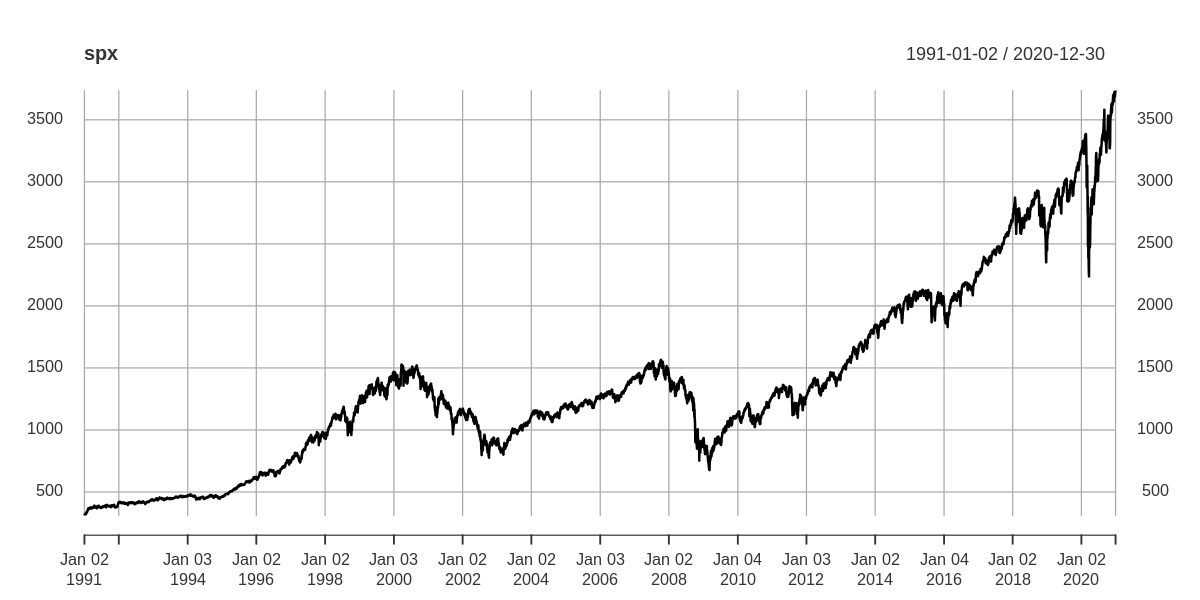

In [9]:
plot(spx)

# Review ARIMA's

## General process

### Review Data

In [57]:
train_end <- '1999-12-31'
test_start <- '2000-01-01'
test_end <- '2000-12-31'
train <- window(spx, end=c(as.Date(train_end)))
test <- window(spx, start=c(as.Date(test_start)), end=c(as.Date(test_end)))
head(train); tail(train); head(test); tail(test)

           GSPC.Adjusted
1991-01-02        326.45
1991-01-03        321.91
1991-01-04        321.00
1991-01-07        315.44
1991-01-08        314.90
1991-01-09        311.49

           GSPC.Adjusted
1999-12-23       1458.34
1999-12-27       1457.10
1999-12-28       1457.66
1999-12-29       1463.46
1999-12-30       1464.47
1999-12-31       1469.25

           GSPC.Adjusted
2000-01-03       1455.22
2000-01-04       1399.42
2000-01-05       1402.11
2000-01-06       1403.45
2000-01-07       1441.47
2000-01-10       1457.60

           GSPC.Adjusted
2000-12-21       1274.86
2000-12-22       1305.95
2000-12-26       1315.19
2000-12-27       1328.92
2000-12-28       1334.22
2000-12-29       1320.28

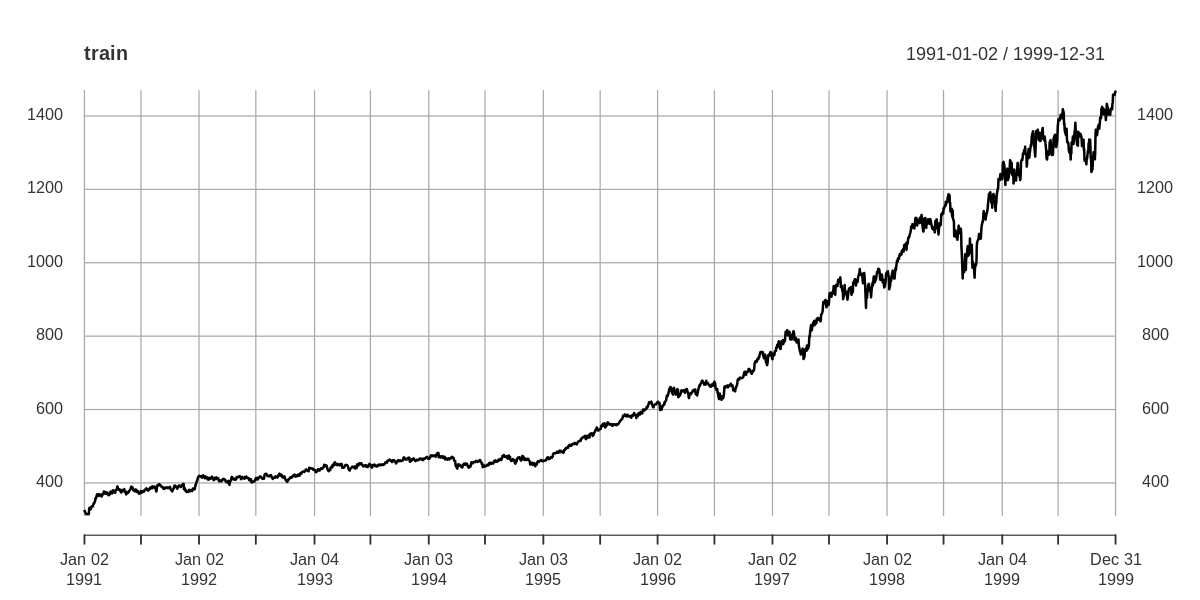

In [58]:
plot(train)

unit root present by adf test

In [12]:
adf.test(train)


	Augmented Dickey-Fuller Test

data:  train
Dickey-Fuller = -0.68357, Lag order = 13, p-value = 0.972
alternative hypothesis: stationary


In [18]:
head(cycle(train), 20)

1991-01-02 1991-01-03 1991-01-04 1991-01-07 1991-01-08 1991-01-09 1991-01-10 
         1          1          1          1          1          1          1 
1991-01-11 1991-01-14 1991-01-15 1991-01-16 1991-01-17 1991-01-18 1991-01-21 
         1          1          1          1          1          1          1 
1991-01-22 1991-01-23 1991-01-24 1991-01-25 1991-01-28 1991-01-29 
         1          1          1          1          1          1 

not work as train has freq 1; not sure how to add frequency to xts object with business days

In [19]:
d <- decompose(train)

ERROR: Error in decompose(train): time series has no or less than 2 periods


In [26]:
frequency(train)

[1] 1

### ARIMA Params

#### Lag

ndiffs suggests 2 lags of difference

In [20]:
ndiffs(train)

[1] 2

Non seansonal data

In [21]:
nsdiffs(train)

ERROR: Error in nsdiffs(train): Non seasonal data


stationary by adf test
- H0: unit root present
- H1: stationary

#### Stationarity Check of Lagged

In [22]:
x <- diff(train, 2)
x <- na.omit(x)

##### 1. ADF
- H0: a unit root is present in a time series sample
- H1: stationary

stationary by adf test

In [23]:
adf.test(x)

Warning message in adf.test(x):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  x
Dickey-Fuller = -12.702, Lag order = 13, p-value = 0.01
alternative hypothesis: stationary


##### 2. Ljung-Box
- H0: The data are independently distributed
- H1: The data are not independently distributed; they exhibit serial correlation.

ar present by Ljung-Box test

In [24]:
Box.test(x, lag=10, type="Ljung-Box")


	Box-Ljung test

data:  x
X-squared = 649.11, df = 10, p-value < 2.2e-16


##### 3. Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
- H0: the data are stationary

lagged not stationary

In [25]:
x %>% ur.kpss() %>% summary()


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 8 lags. 

Value of test-statistic is: 0.5264 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


#### Params of AR & MA
- use differenced data for acf/pacf

ARMA(p,q): no idea about p & q but take 1 for q at least

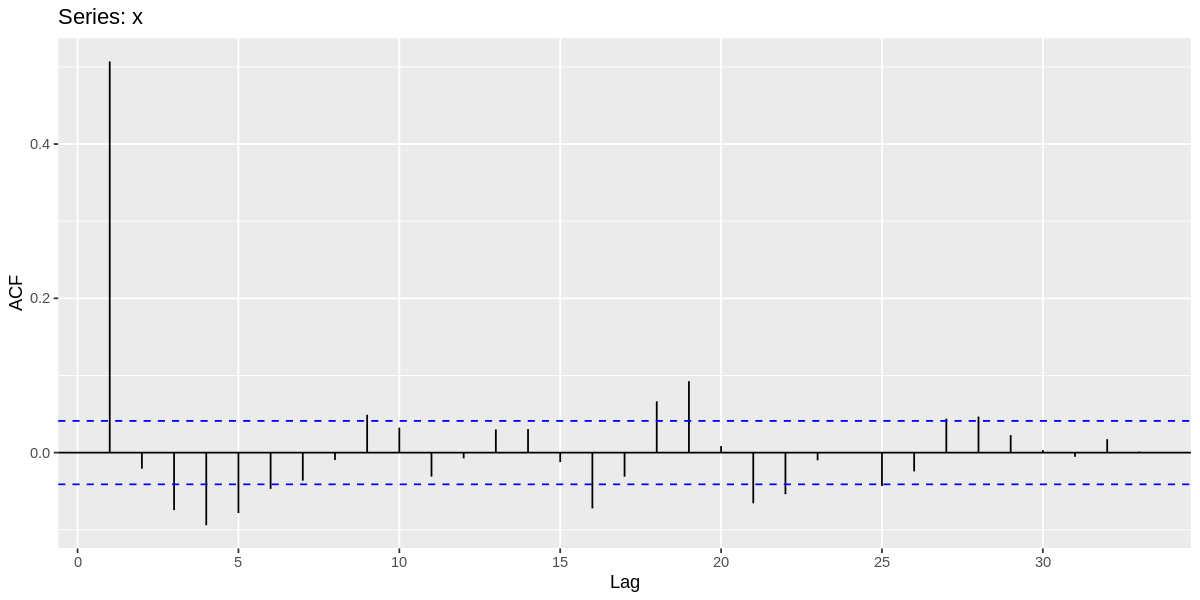

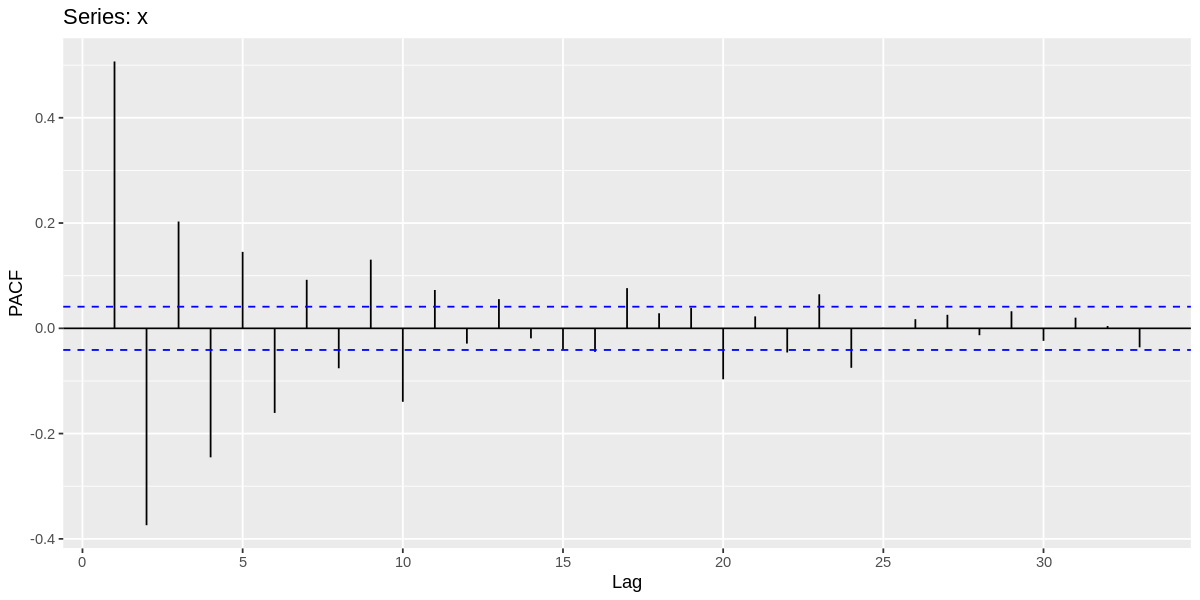

In [26]:
#acf(x); pacf(x)
#acf(x, na.action=na.omit); pacf(x, na.action=na.omit)
ggAcf(x); ggPacf(x)

### Contruct ARIMA

In [27]:
fit <- arima(train, order=c(1,2,0))
fit


Call:
arima(x = train, order = c(1, 2, 0))

Coefficients:
          ar1
      -0.5128
s.e.   0.0180

sigma^2 estimated as 93.62:  log likelihood = -8384.23,  aic = 16772.47

similar to arima but more informative

In [50]:
fit <- Arima(train, order=c(1,2,0))
fit

Series: train 
ARIMA(1,2,0) 

Coefficients:
          ar1
      -0.5128
s.e.   0.0180

sigma^2 = 93.66:  log likelihood = -8384.23
AIC=16772.47   AICc=16772.47   BIC=16783.93

residuals not stationary

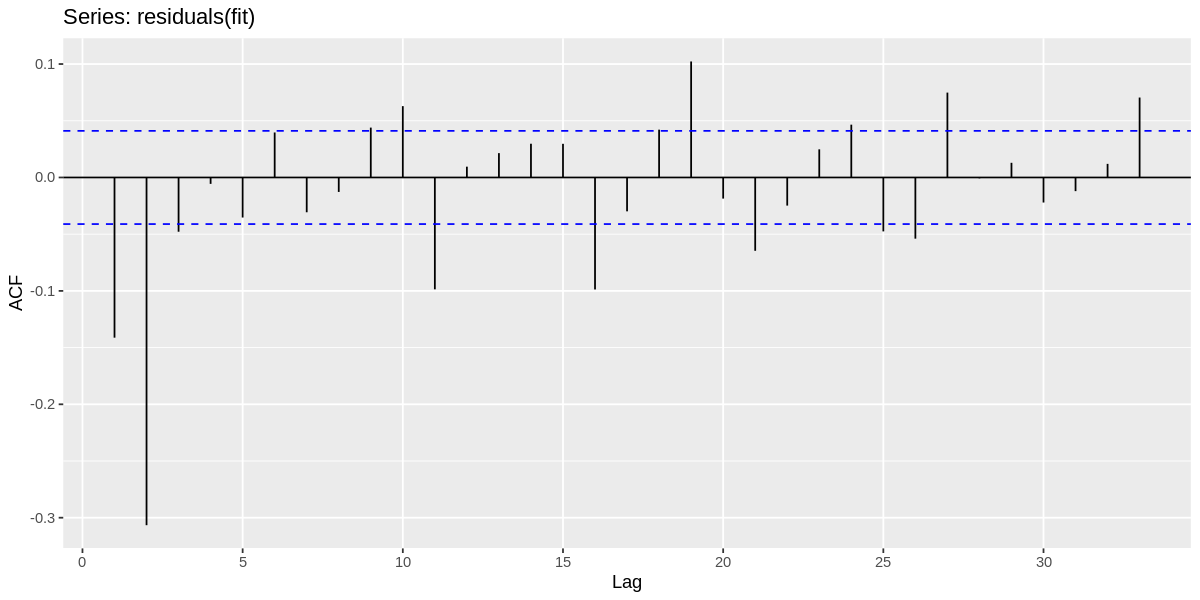

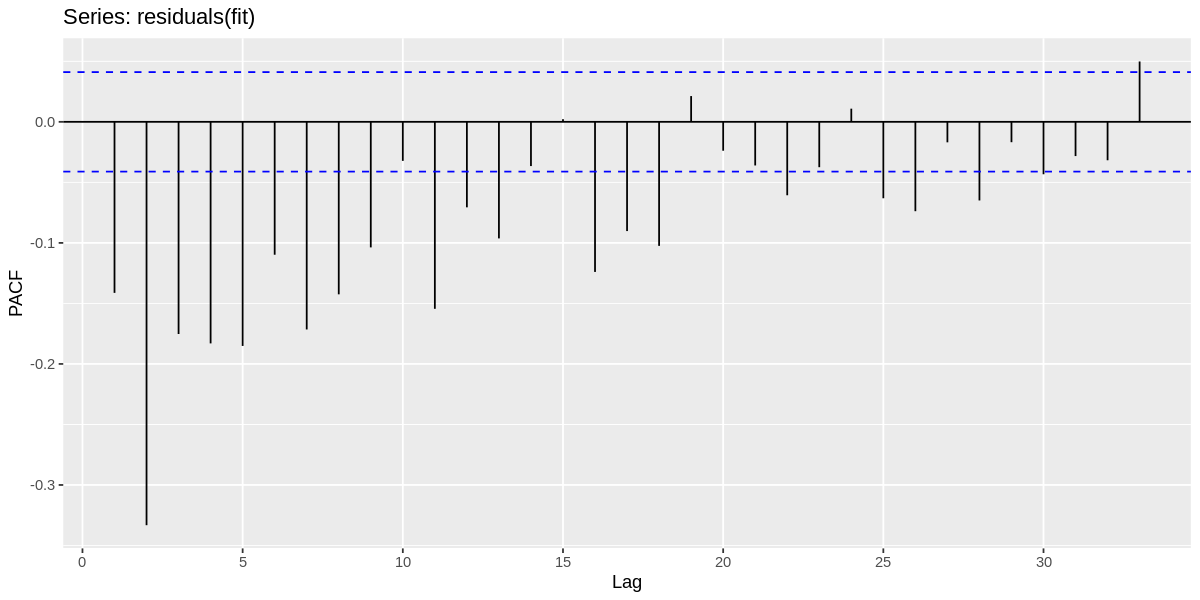

In [51]:
ggAcf(residuals(fit)); ggPacf(residuals(fit))

### Auto ARIMA

params of auto.arima same as those i used before

In [59]:
fit <- auto.arima(train, trace=TRUE, ic='aicc', seasonal=FALSE)
#fit


 Fitting models using approximations to speed things up...

 ARIMA(2,2,2)                    : Inf
 ARIMA(0,2,0)                    : 17454.51
 ARIMA(1,2,0)                    : 16763.38
 ARIMA(0,2,1)                    : 15902.14
 ARIMA(1,2,1)                    : Inf
 ARIMA(0,2,2)                    : 15904.15
 ARIMA(1,2,2)                    : Inf

 Now re-fitting the best model(s) without approximations...

 ARIMA(0,2,1)                    : Inf
 ARIMA(0,2,2)                    : Inf
 ARIMA(1,2,0)                    : 16772.47

 Best model: ARIMA(1,2,0)                    



residuals still has auto-regression

In [32]:
accuracy(fit)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.004988956,9.671423,6.033241,0.001078115,0.784261,1.256237,-0.1412725


### Review Residuals

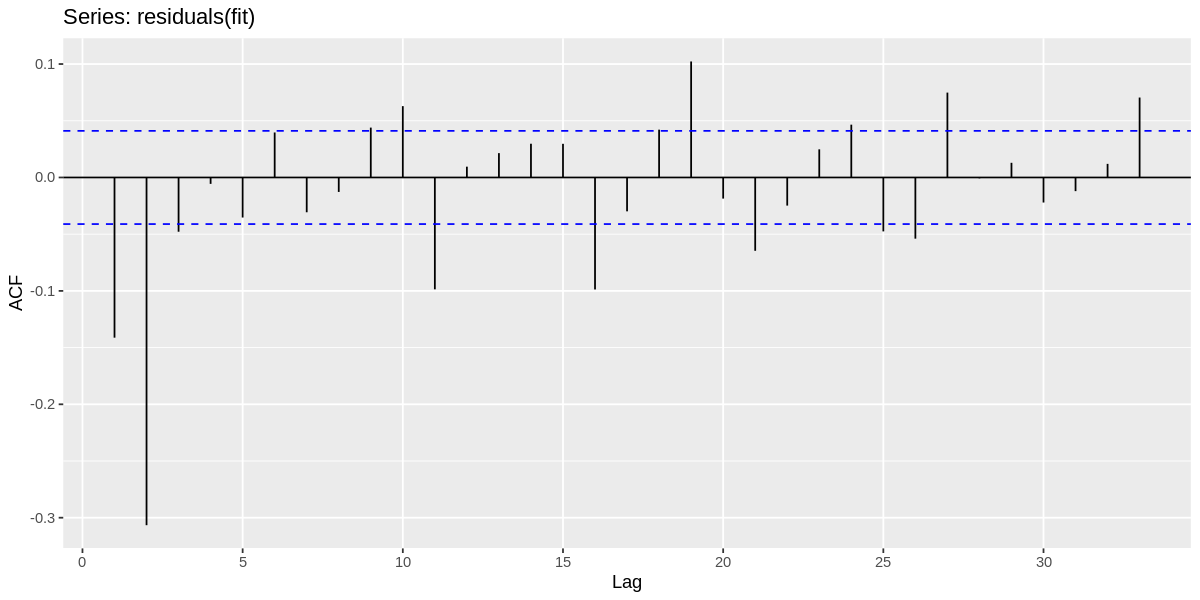

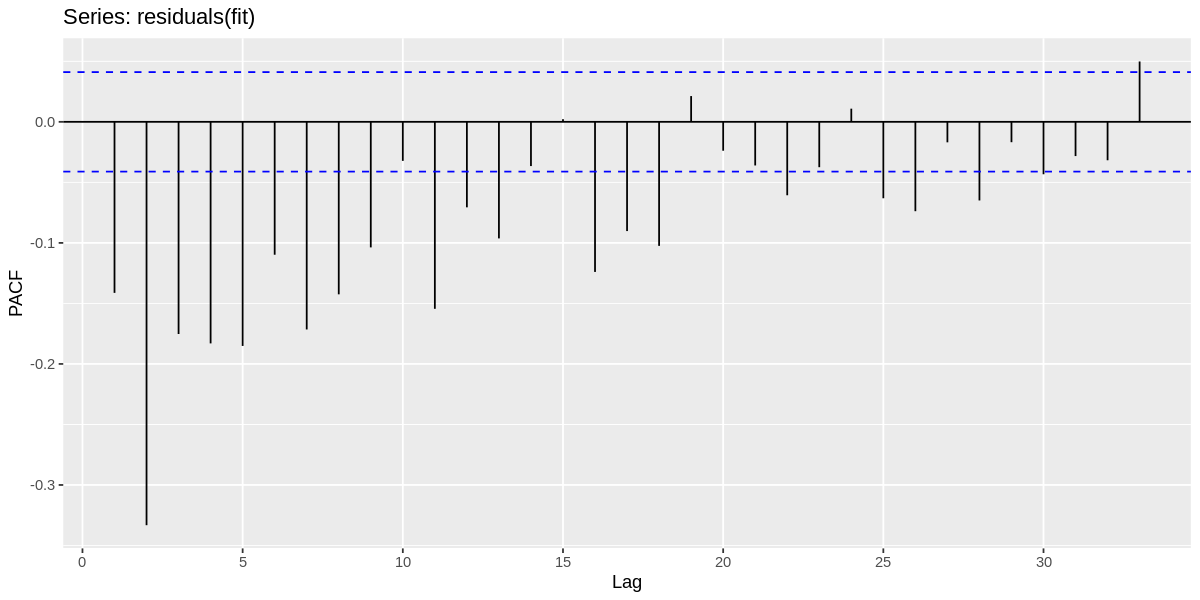

In [30]:
#par(mfrow=c(2,1))
ggAcf(residuals(fit)); ggPacf(residuals(fit))


	Ljung-Box test

data:  Residuals from ARIMA(1,2,0)
Q* = 287.48, df = 9, p-value < 2.2e-16

Model df: 1.   Total lags used: 10



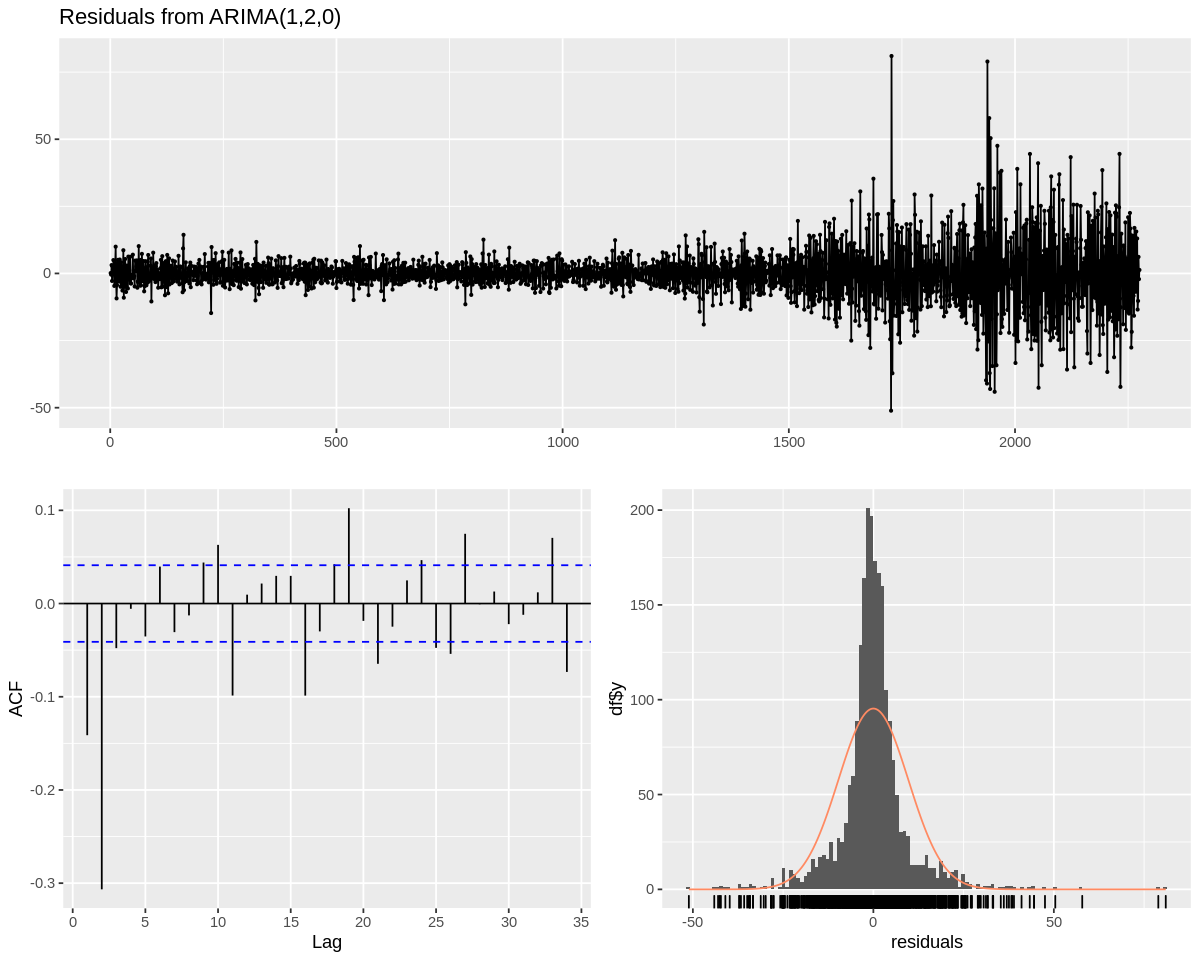

In [35]:
checkresiduals(fit)

In [33]:
res <- fit$residuals

In [34]:
my.figsize(10,8)

residual has auto-regression from L-B test (H0: no ar)

In [36]:
Box.test(res, type="Ljung-Box", lag=10)


	Box-Ljung test

data:  res
X-squared = 287.48, df = 10, p-value < 2.2e-16


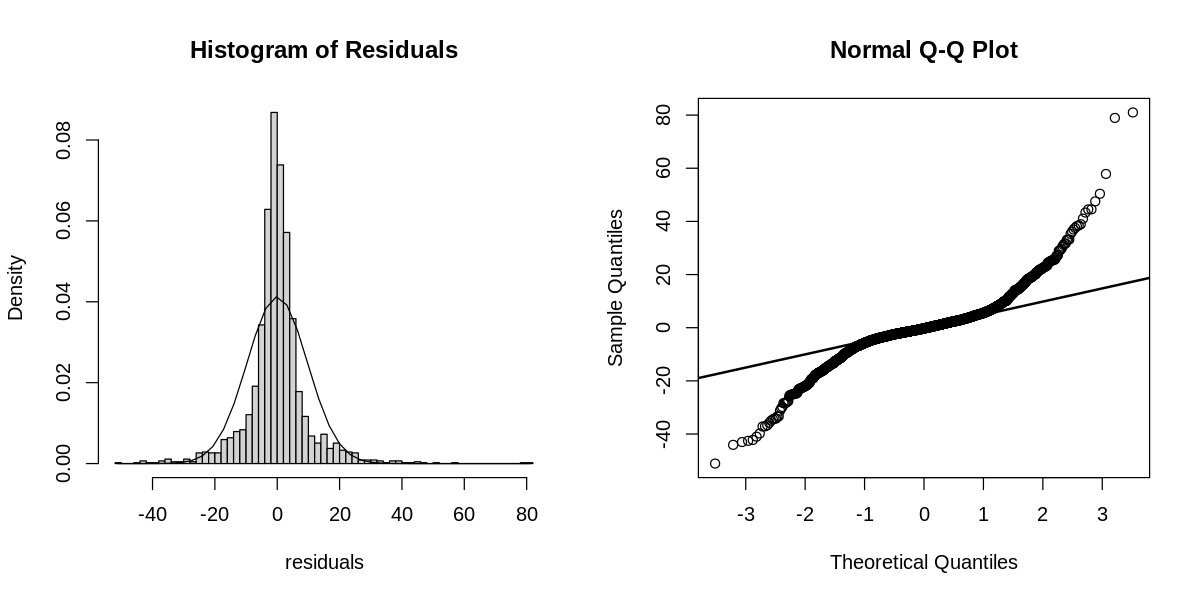

In [37]:
my.figsize(10,5)
par(mfrow=c(1,2))

hist(res, breaks=50, prob=TRUE, xlab='residuals', main='Histogram of Residuals')
x <- seq(min(res), max(res), length.out=40)
y <- dnorm(x, mean=mean(res), sd=sd(res))
lines(x,y)

qqnorm(res, pch=21)
qqline(res, lwd=2)

fail to plot side by side with gghistogram

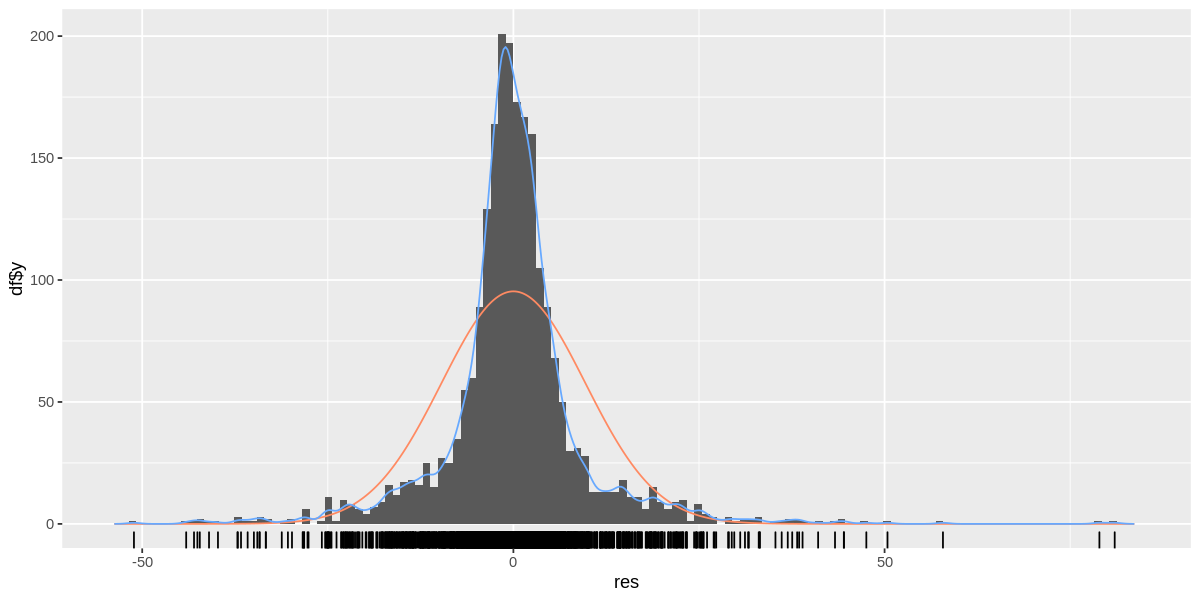

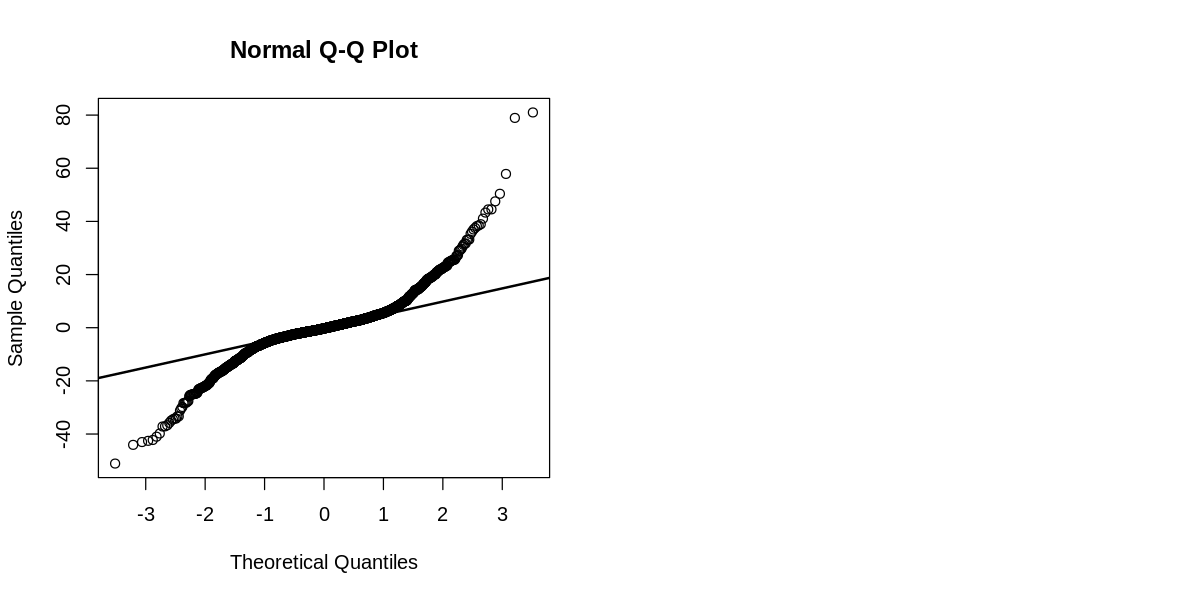

In [38]:
my.figsize(10,5)
par(mfrow=c(1,2))

gghistogram(res, add.normal = TRUE, add.kde = TRUE, add.rug = TRUE)

qqnorm(res, pch=21)
qqline(res, lwd=2)

### Forecast

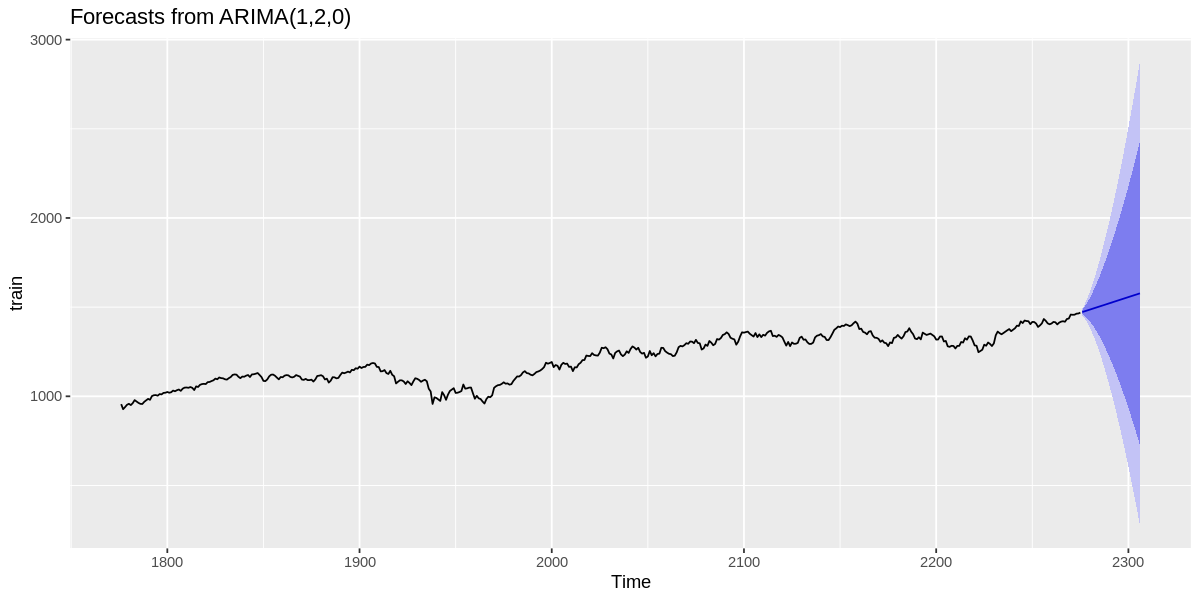

In [60]:
#u.plot_forecast(fit, 31)
u.plot_forecast(fit, 31, 500)

forecasting is unrealistic; is there any param controlling cutoff?

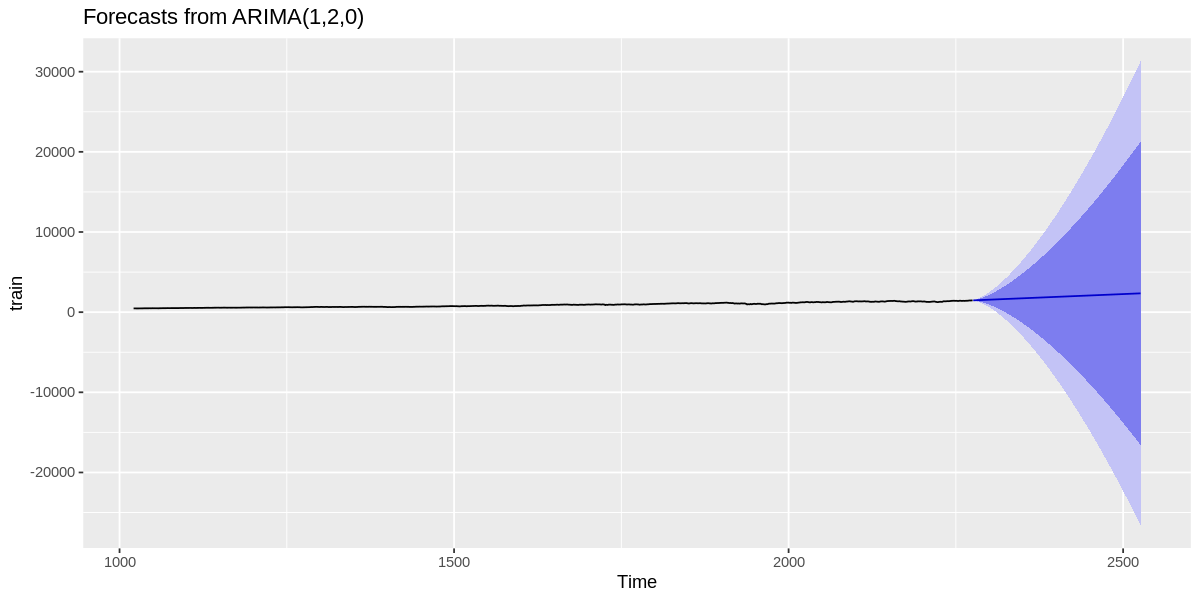

In [61]:
u.plot_forecast(fit, 251, 251*5)

## Transform

### Log Return

#### Review Data

In [14]:
spx.lr <- na.omit(diff(log(spx)))

In [15]:
train_end <- '1999-12-31'
test_start <- '2000-01-01'
test_end <- '2000-12-31'
train <- window(spx.lr, end=c(as.Date(train_end)))
test <- window(spx.lr, start=c(as.Date(test_start)), end=c(as.Date(test_end)))
head(train); tail(train); head(test); tail(test)

           GSPC.Adjusted
1991-01-03  -0.014004819
1991-01-04  -0.002830893
1991-01-07  -0.017472627
1991-01-08  -0.001713387
1991-01-09  -0.010887906
1991-01-10   0.009712255

           GSPC.Adjusted
1999-12-23  0.0153467800
1999-12-27 -0.0008506367
1999-12-28  0.0003842910
1999-12-29  0.0039710348
1999-12-30  0.0006899141
1999-12-31  0.0032586840

           GSPC.Adjusted
2000-01-03 -0.0095949945
2000-01-04 -0.0390991755
2000-01-05  0.0019203377
2000-01-06  0.0009552219
2000-01-07  0.0267299501
2000-01-10  0.0111278250

           GSPC.Adjusted
2000-12-21   0.007969797
2000-12-22   0.024094351
2000-12-26   0.007050389
2000-12-27   0.010385518
2000-12-28   0.003980214
2000-12-29  -0.010502972

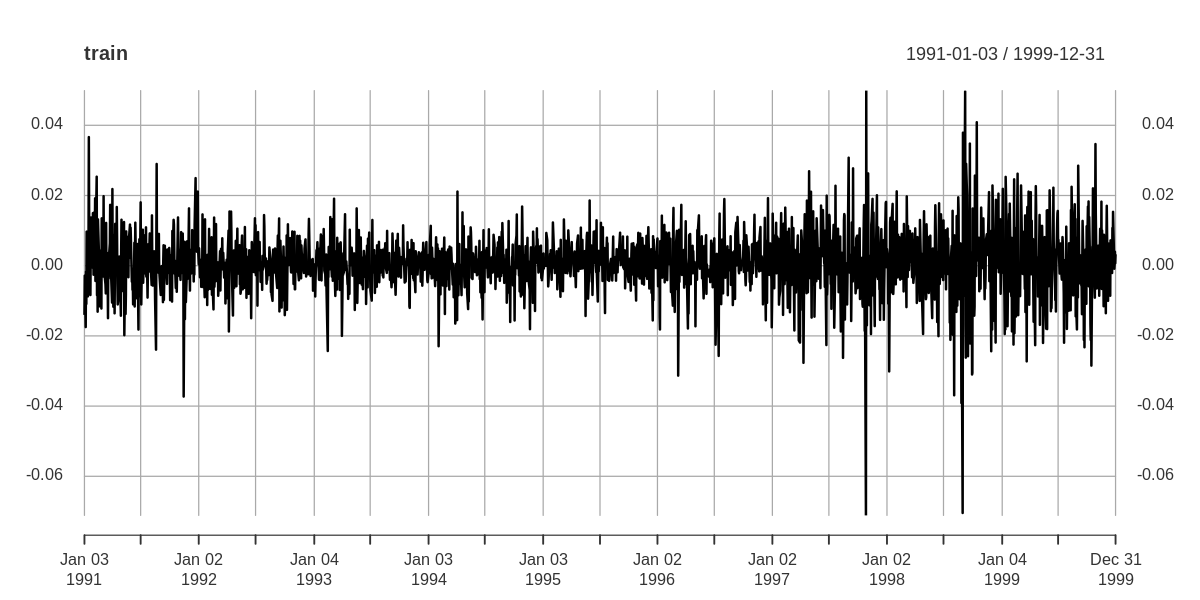

In [16]:
plot(train)

log return is stationary by adf & kpss but non-stationary by L-B test

In [30]:
adf.test(train)
Box.test(train, lag=10, type="Ljung-Box")
train %>% ur.kpss() %>% summary()

Warning message in adf.test(train):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  train
Dickey-Fuller = -13.01, Lag order = 13, p-value = 0.01
alternative hypothesis: stationary



	Box-Ljung test

data:  train
X-squared = 23.59, df = 10, p-value = 0.008765



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 8 lags. 

Value of test-statistic is: 0.1541 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


no lag for log return

In [31]:
ndiffs(train); nsdiffs(train)

[1] 0

ERROR: Error in nsdiffs(train): Non seasonal data


[1] 0

guess 3 for both p & q of ARIMA(p,d,q)

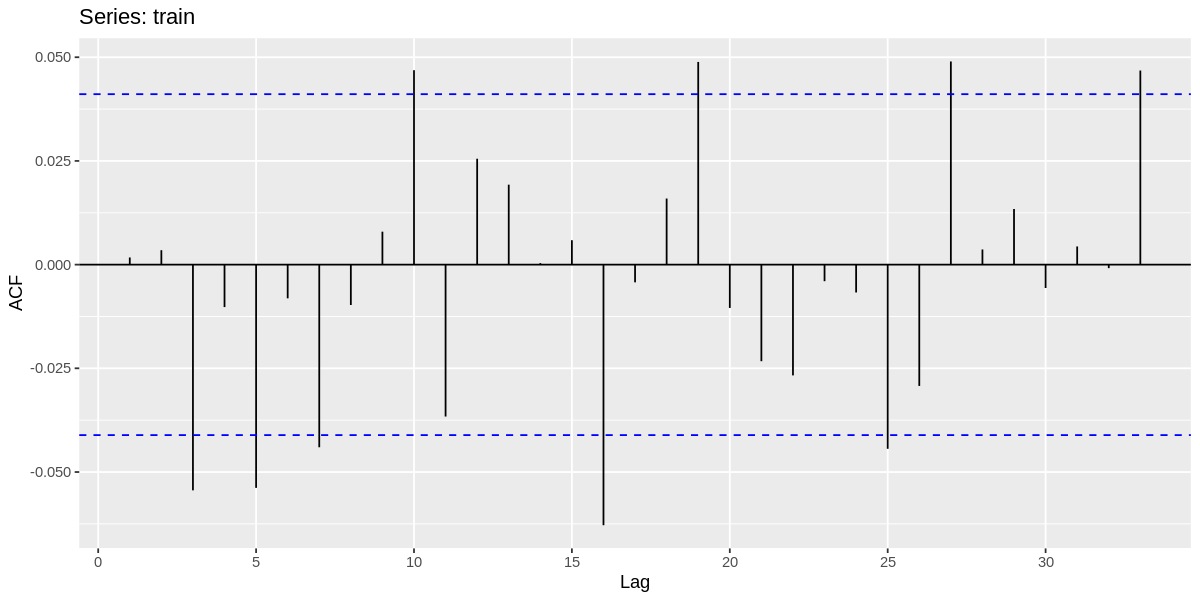

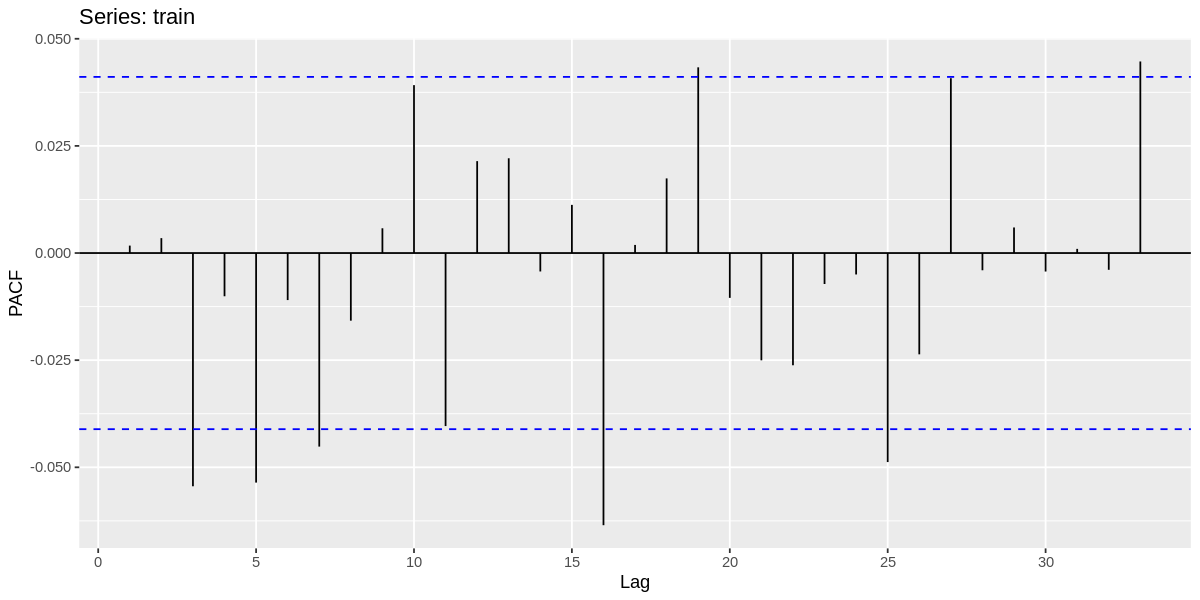

In [32]:
ggAcf(train); ggPacf(train)

#### Fitting ARIMA

my quess for params of ARIMA same as auto.arima

In [33]:
fit <- auto.arima(train, trace=TRUE, ic='aicc', seasonal=FALSE)
#fit


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : -15099.65
 ARIMA(0,0,0) with non-zero mean : -15098.04
 ARIMA(1,0,0) with non-zero mean : -15097.86
 ARIMA(0,0,1) with non-zero mean : -15096.05
 ARIMA(0,0,0) with zero mean     : -15087.07
 ARIMA(1,0,2) with non-zero mean : Inf
 ARIMA(2,0,1) with non-zero mean : Inf
 ARIMA(3,0,2) with non-zero mean : -15107.24
 ARIMA(3,0,1) with non-zero mean : -15105.42
 ARIMA(4,0,2) with non-zero mean : -15104.66
 ARIMA(3,0,3) with non-zero mean : -15110.69
 ARIMA(2,0,3) with non-zero mean : -15107.17
 ARIMA(4,0,3) with non-zero mean : Inf
 ARIMA(3,0,4) with non-zero mean : -15110.14
 ARIMA(2,0,4) with non-zero mean : -15105.54
 ARIMA(4,0,4) with non-zero mean : Inf
 ARIMA(3,0,3) with zero mean     : -15095.7

 Now re-fitting the best model(s) without approximations...

 ARIMA(3,0,3) with non-zero mean : -15103.77

 Best model: ARIMA(3,0,3) with non-zero mean 



In [35]:
accuracy(fit)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-4.427426e-06,0.008708574,0.006173215,-Inf,Inf,0.6917749,0.006736615


#### Review Residuals

In [40]:
my.figsize(10,8)

residuals are ind.dist


	Ljung-Box test

data:  Residuals from ARIMA(3,0,3) with non-zero mean
Q* = 4.7558, df = 4, p-value = 0.3133

Model df: 6.   Total lags used: 10



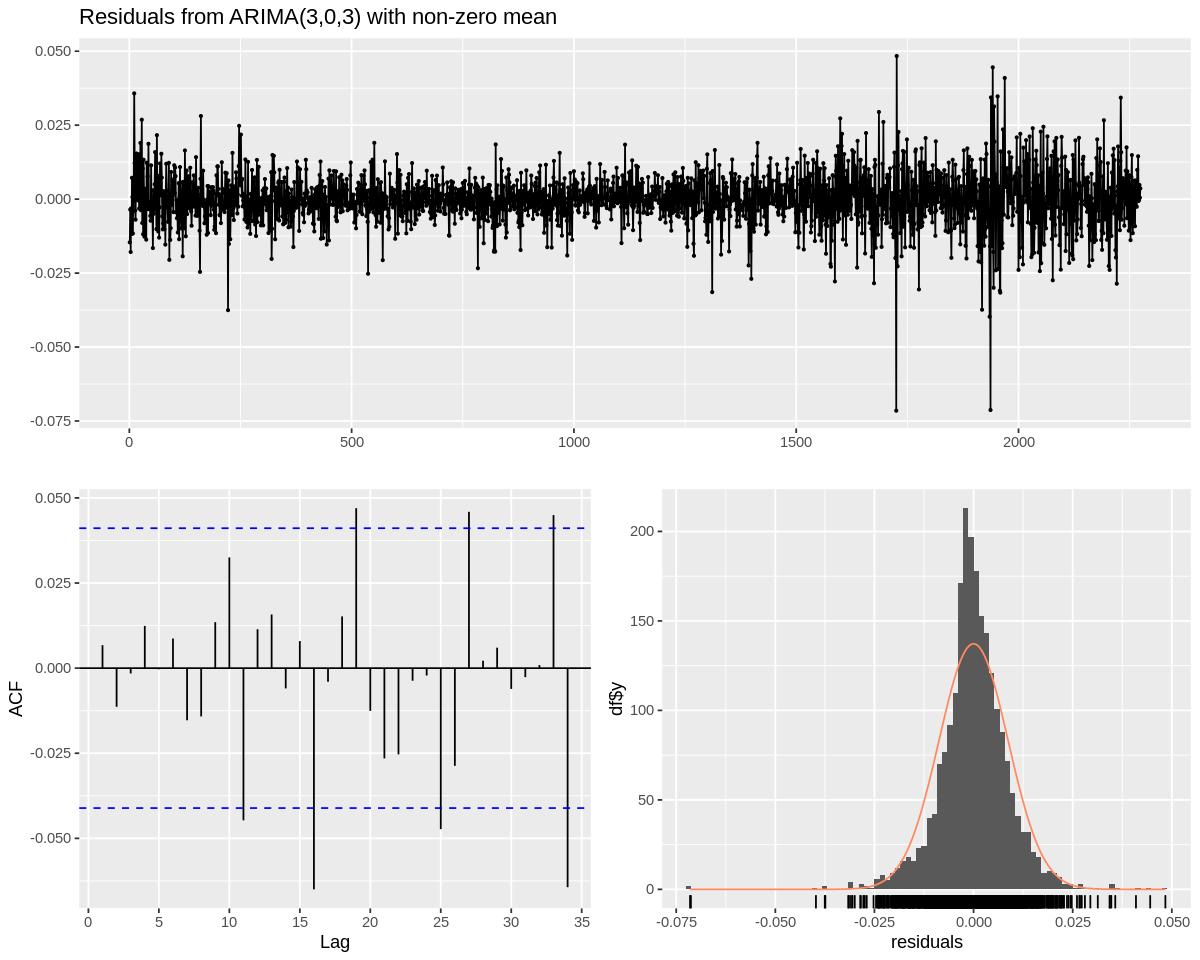

In [41]:
checkresiduals(fit)

In [42]:
res <- fit$residuals

p-value is diff from checkresiduals but still ind.dist

In [44]:
Box.test(res, type="Ljung-Box", lag=4)


	Box-Ljung test

data:  res
X-squared = 0.75327, df = 4, p-value = 0.9446


In [50]:
my.figsize(10,4)

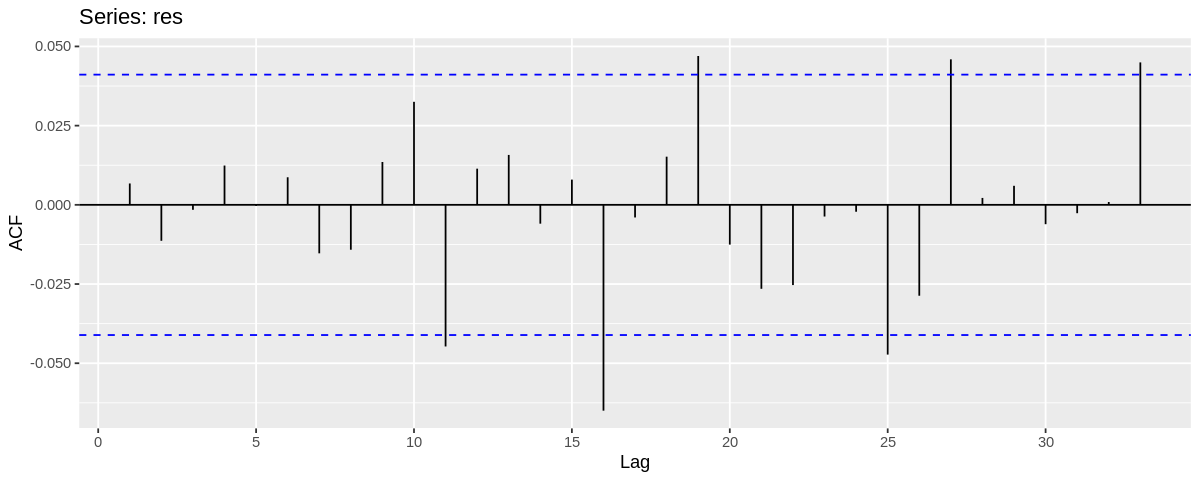

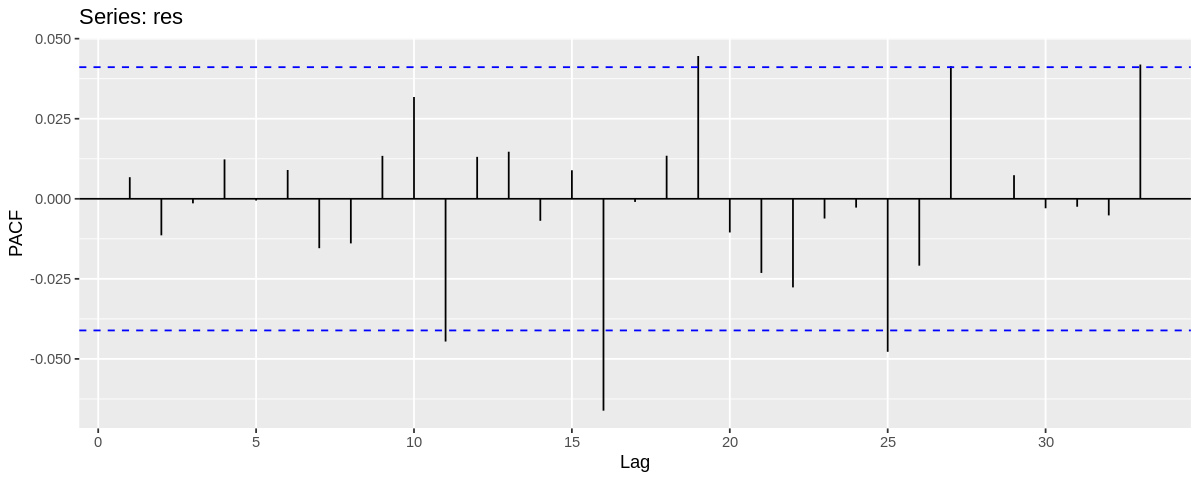

In [51]:
ggAcf(res); ggPacf(res)

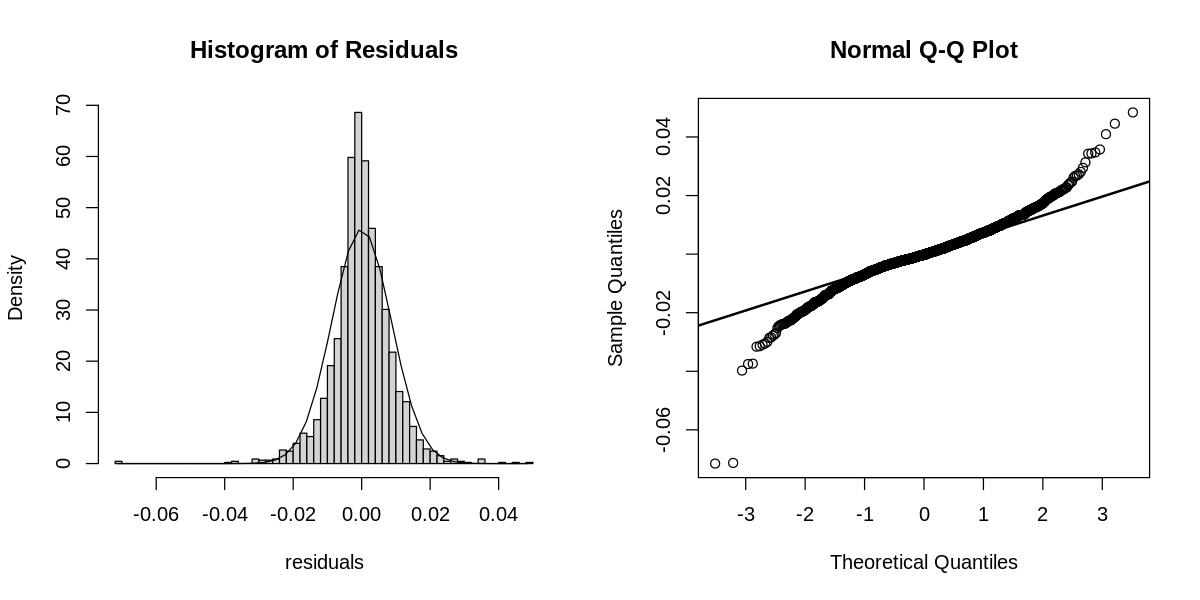

In [52]:
my.figsize(10,5)
par(mfrow=c(1,2))

hist(res, breaks=50, prob=TRUE, xlab='residuals', main='Histogram of Residuals')
x <- seq(min(res), max(res), length.out=40)
y <- dnorm(x, mean=mean(res), sd=sd(res))
lines(x,y)

qqnorm(res, pch=21)
qqline(res, lwd=2)

#### Forecast
- realistic result compared to close price modeling but still uninteresting forecast
- forcast looks like constant which might be from stationary assumption (constant variance?)
- another issue is how to forecast price from log return; is it just ok to calc price with last price obs and forecasted return results

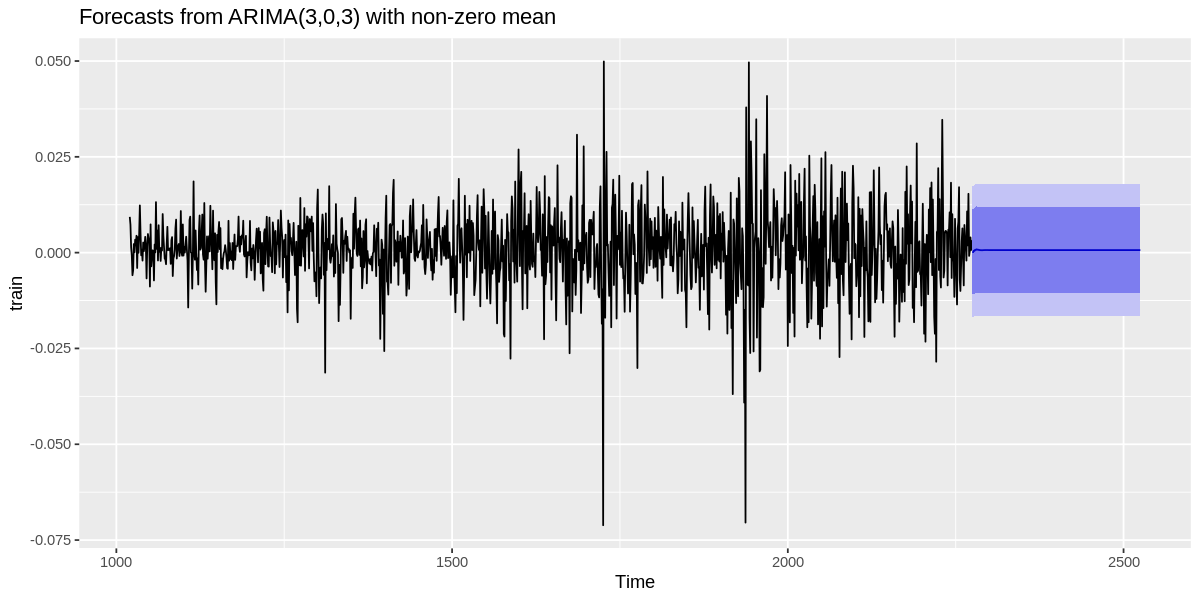

In [56]:
u.plot_forecast(fit, 251, 251*5)

### Power Transform

#### Review Data

In [329]:
train_end <- '1999-12-31'
test_start <- '2000-01-01'
test_end <- '2000-12-31'
train <- window(spx, end=c(as.Date(train_end)))
test <- window(spx, start=c(as.Date(test_start)), end=c(as.Date(test_end)))
head(train); tail(train); head(test); tail(test)

           GSPC.Adjusted
1991-01-02        326.45
1991-01-03        321.91
1991-01-04        321.00
1991-01-07        315.44
1991-01-08        314.90
1991-01-09        311.49

           GSPC.Adjusted
1999-12-23       1458.34
1999-12-27       1457.10
1999-12-28       1457.66
1999-12-29       1463.46
1999-12-30       1464.47
1999-12-31       1469.25

           GSPC.Adjusted
2000-01-03       1455.22
2000-01-04       1399.42
2000-01-05       1402.11
2000-01-06       1403.45
2000-01-07       1441.47
2000-01-10       1457.60

           GSPC.Adjusted
2000-12-21       1274.86
2000-12-22       1305.95
2000-12-26       1315.19
2000-12-27       1328.92
2000-12-28       1334.22
2000-12-29       1320.28

In [330]:
library(TSA)

fail to run BoxCox but why?

In [331]:
BoxCox.ar(train)

Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
“possible convergence problem: optim gave code = 1”


ERROR: Error in solve.default(res$hessian * length(x)): Lapack routine dgesv: system is exactly singular: U[2,2] = 0


set 0.5 for power anyway

In [332]:
x <- log(train)

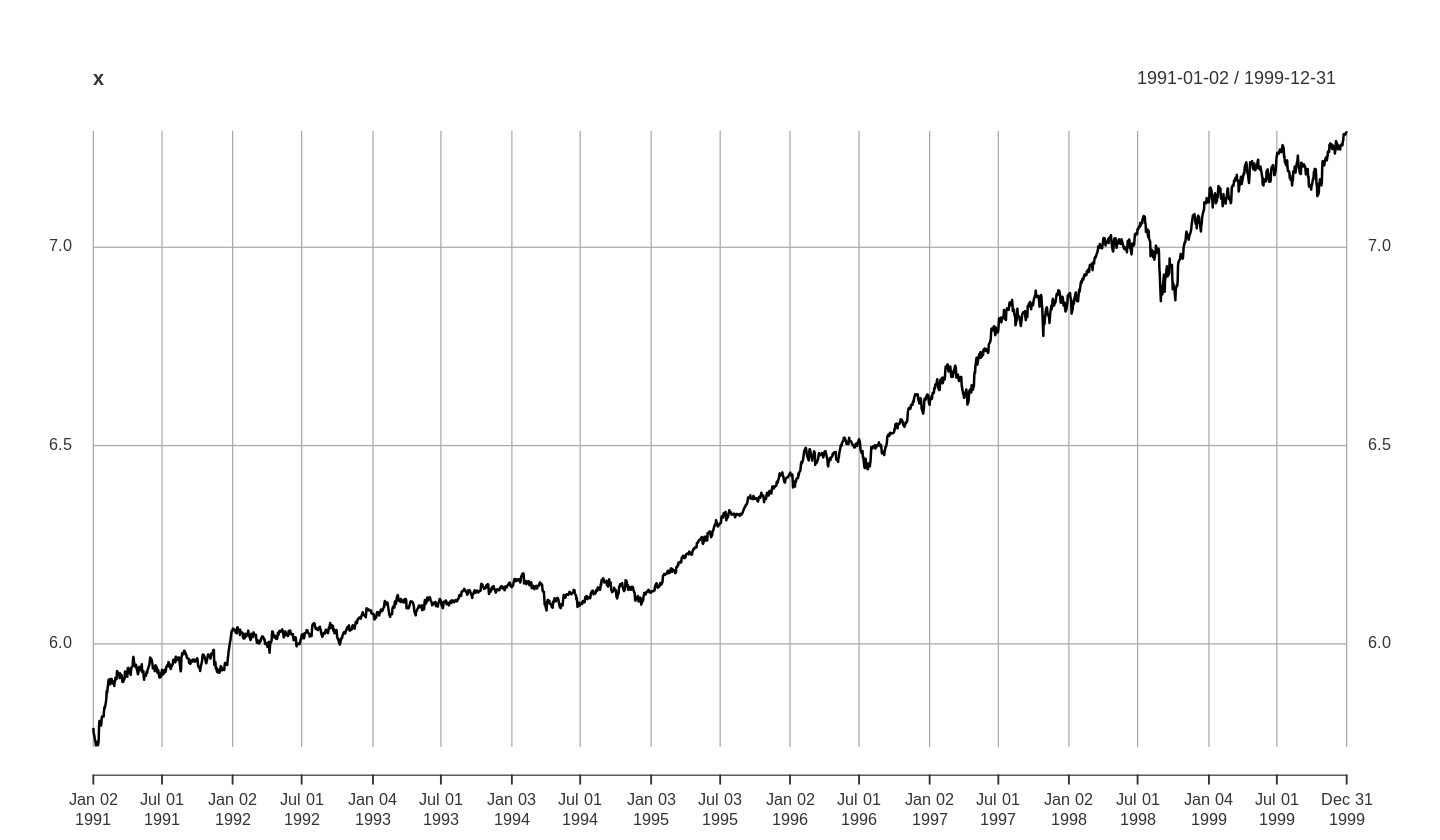

In [333]:
plot(x)

transformed data is not stationary

In [334]:
adf.test(x)
Box.test(x, lag=10, type="Ljung-Box")
x %>% ur.kpss() %>% summary()


	Augmented Dickey-Fuller Test

data:  x
Dickey-Fuller = -1.4913, Lag order = 13, p-value = 0.7937
alternative hypothesis: stationary



	Box-Ljung test

data:  x
X-squared = 22427, df = 10, p-value < 2.2e-16



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 8 lags. 

Value of test-statistic is: 24.274 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


#### Fitting ARIMA

no lag for log return

In [98]:
ndiffs(x); nsdiffs(x)

[1] 1

ERROR: Error in nsdiffs(x): Non seasonal data


[1] 1

In [99]:
x <- diff(x, 1)
x <- na.omit(x)

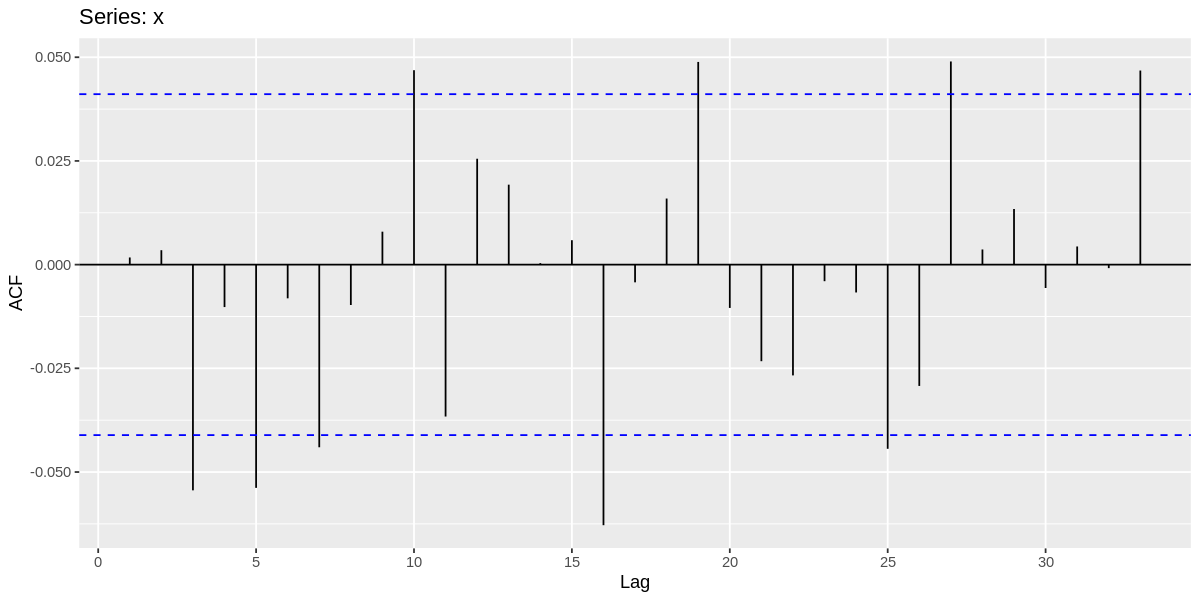

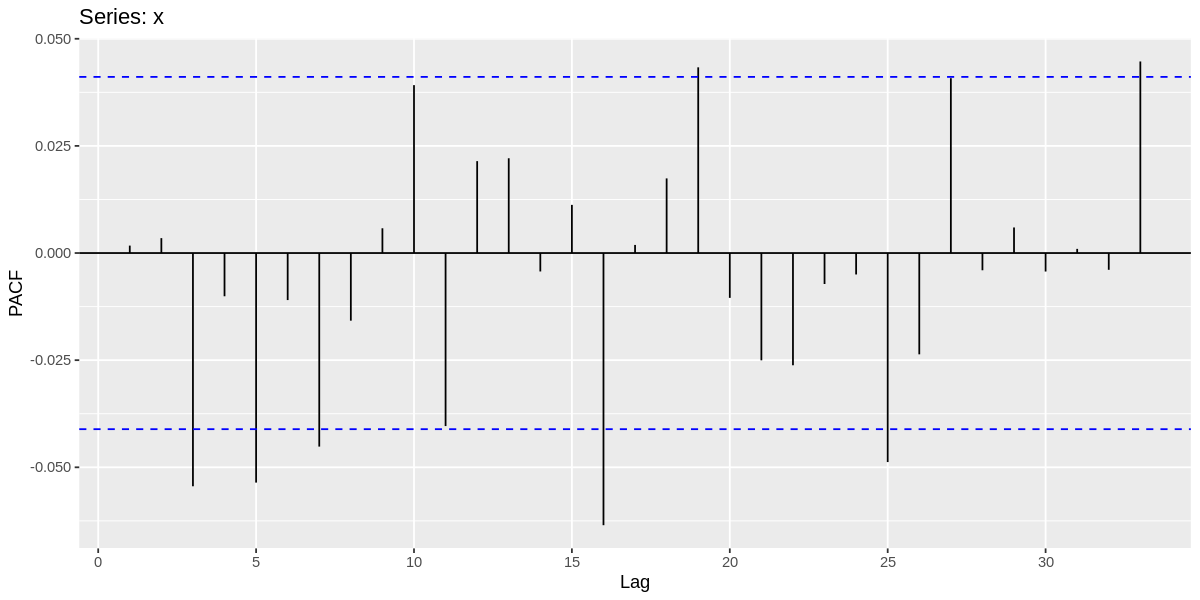

In [100]:
ggAcf(x); ggPacf(x)

In [335]:
train <- log(train)
test <- log(test)

In [336]:
fit <- auto.arima(train, trace=TRUE, ic='aicc', seasonal=FALSE)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : -15090.18
 ARIMA(0,1,0) with drift         : -15088.57
 ARIMA(1,1,0) with drift         : -15088.39
 ARIMA(0,1,1) with drift         : -15086.57
 ARIMA(0,1,0)                    : -15077.59
 ARIMA(1,1,2) with drift         : Inf
 ARIMA(2,1,1) with drift         : Inf
 ARIMA(3,1,2) with drift         : -15097.77
 ARIMA(3,1,1) with drift         : -15095.94
 ARIMA(4,1,2) with drift         : -15095.18
 ARIMA(3,1,3) with drift         : -15101.22
 ARIMA(2,1,3) with drift         : -15097.7
 ARIMA(4,1,3) with drift         : Inf
 ARIMA(3,1,4) with drift         : -15100.66
 ARIMA(2,1,4) with drift         : -15096.07
 ARIMA(4,1,4) with drift         : Inf
 ARIMA(3,1,3)                    : -15086.23

 Now re-fitting the best model(s) without approximations...

 ARIMA(3,1,3) with drift         : -15103.77

 Best model: ARIMA(3,1,3) with drift         



In [103]:
accuracy(fit)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-1.797475e-06,0.008707504,0.006173046,-0.00030669,0.09472613,0.993907,0.006237531


#### Review Residuals

In [62]:
my.figsize(10,8)

residuals are ind.dist


	Ljung-Box test

data:  Residuals from ARIMA(3,1,3) with drift
Q* = 4.8184, df = 4, p-value = 0.3064

Model df: 6.   Total lags used: 10



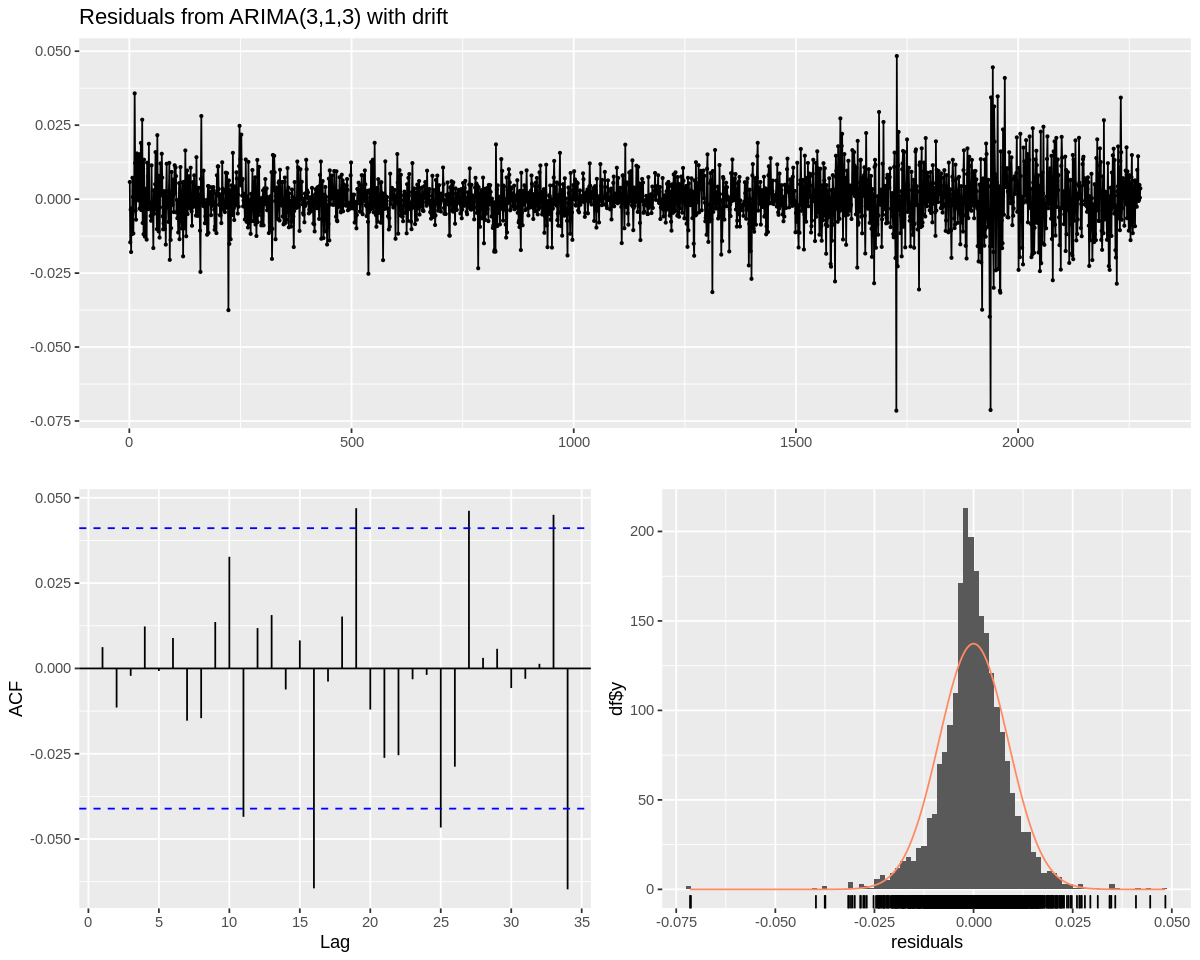

In [63]:
checkresiduals(fit)

In [64]:
res <- fit$residuals

In [65]:
Box.test(res, type="Ljung-Box", lag=9)


	Box-Ljung test

data:  res
X-squared = 2.369, df = 9, p-value = 0.9842


In [66]:
my.figsize(10,4)

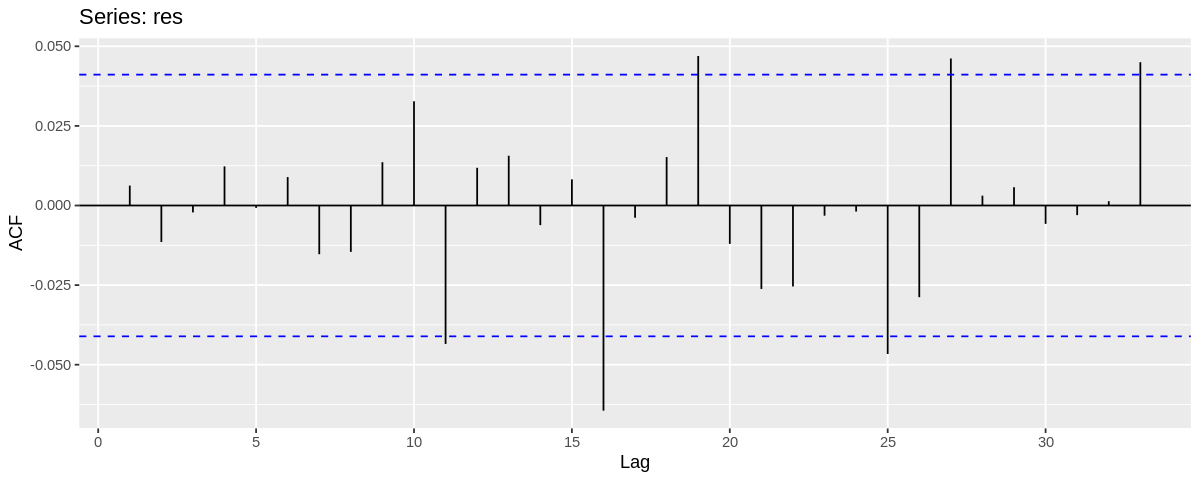

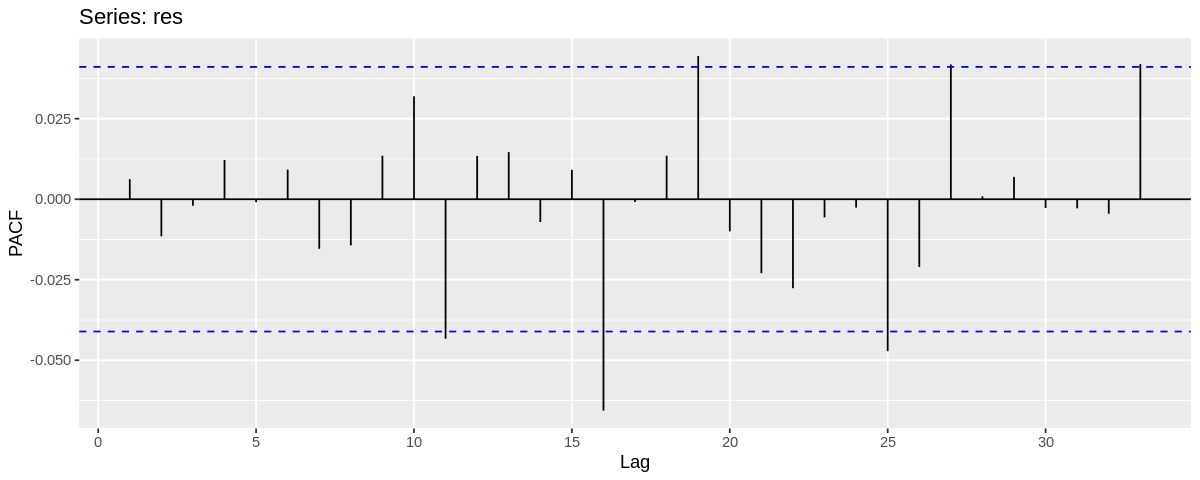

In [67]:
ggAcf(res); ggPacf(res)

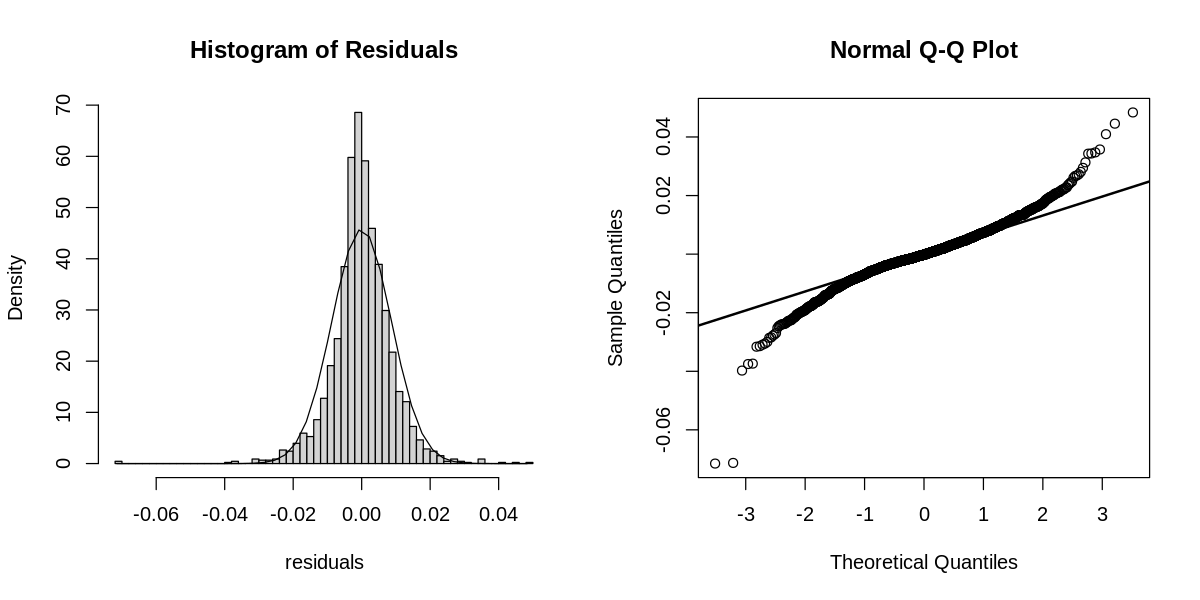

In [68]:
my.figsize(10,5)
par(mfrow=c(1,2))

hist(res, breaks=50, prob=TRUE, xlab='residuals', main='Histogram of Residuals')
x <- seq(min(res), max(res), length.out=40)
y <- dnorm(x, mean=mean(res), sd=sd(res))
lines(x,y)

qqnorm(res, pch=21)
qqline(res, lwd=2)

#### Forecast

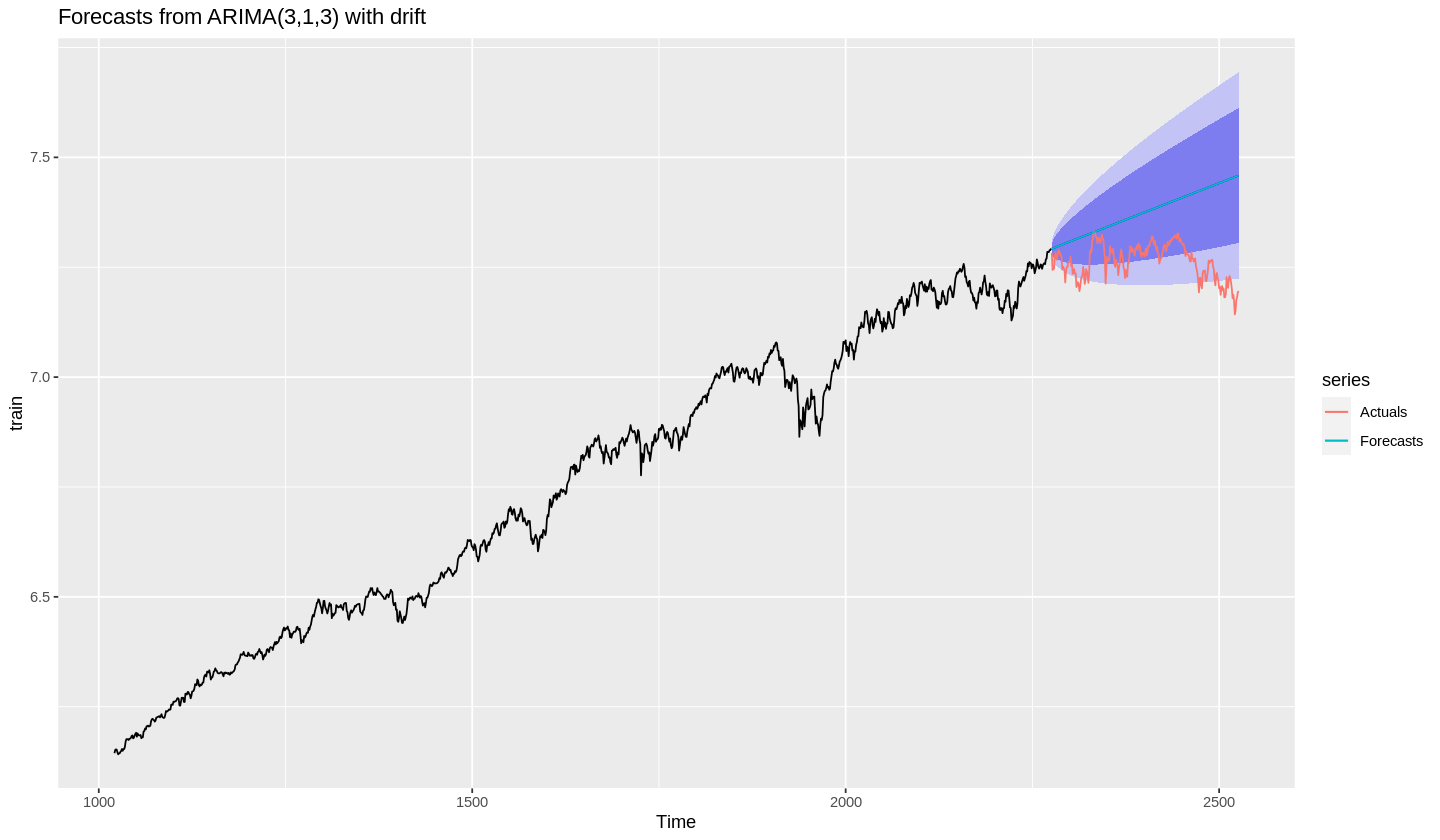

In [337]:
u.plot_forecast(fit, 251, 251*5, test)

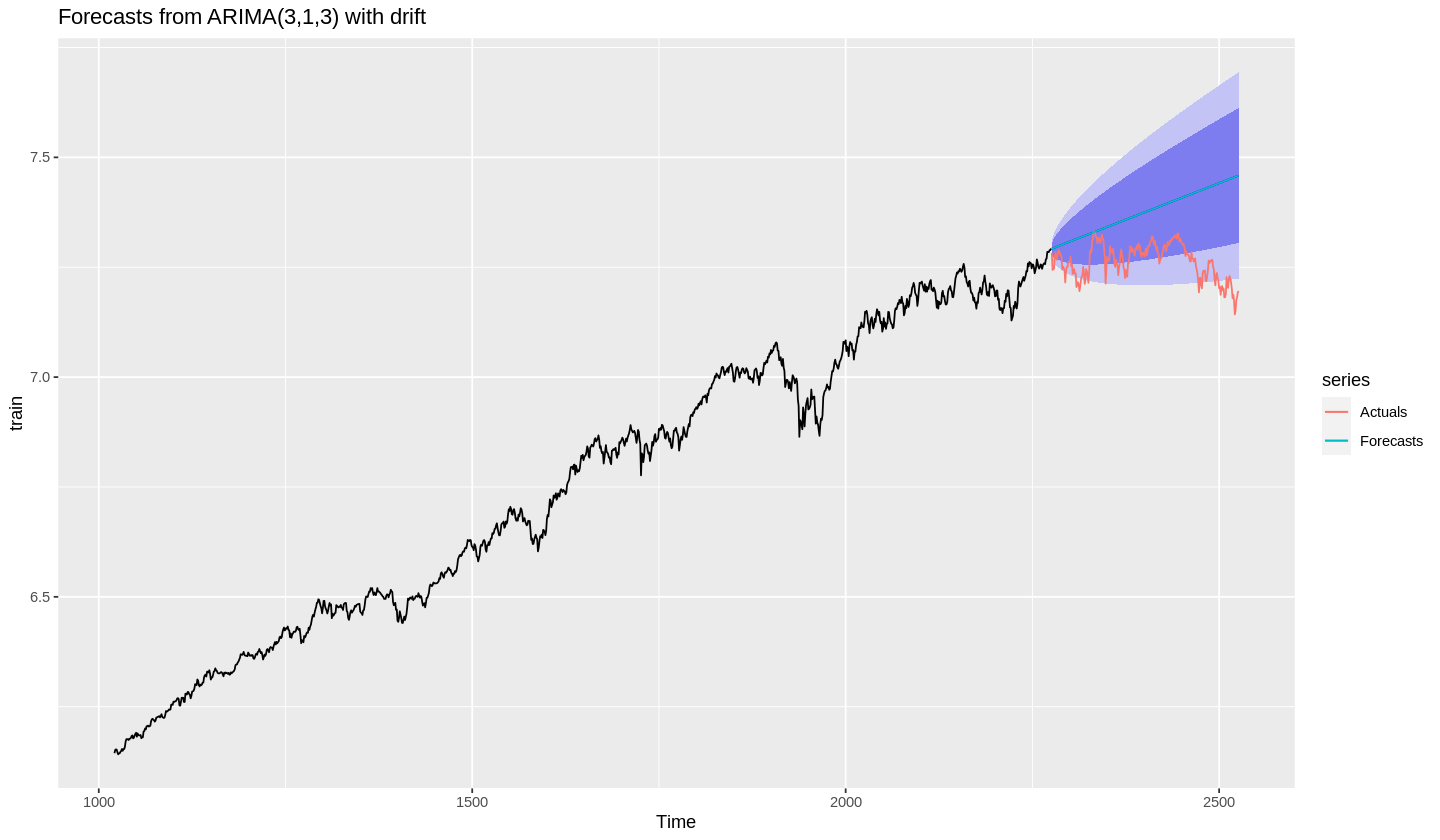

In [339]:
# fail to inverse-transform
# not sure how to inv-transform the series' in forecast

future <- 251
past <- 251*5

y <- forecast(fit, h=future)
gg <- autoplot(y, include=past)

test.ts <- ts(as.numeric(test), start=start(y$mean)[1], end=end(y$mean)[1])
gg +
   autolayer(test.ts, series="Actuals") +
   autolayer(y$mean, series="Forecasts")

### Box-Cox transformation of auto.arima

#### Review Data

In [107]:
train_end <- '1999-12-31'
test_start <- '2000-01-01'
test_end <- '2000-12-31'
train <- window(spx, end=c(as.Date(train_end)))
test <- window(spx, start=c(as.Date(test_start)), end=c(as.Date(test_end)))
head(train); tail(train); head(test); tail(test)

           GSPC.Adjusted
1991-01-02        326.45
1991-01-03        321.91
1991-01-04        321.00
1991-01-07        315.44
1991-01-08        314.90
1991-01-09        311.49

           GSPC.Adjusted
1999-12-23       1458.34
1999-12-27       1457.10
1999-12-28       1457.66
1999-12-29       1463.46
1999-12-30       1464.47
1999-12-31       1469.25

           GSPC.Adjusted
2000-01-03       1455.22
2000-01-04       1399.42
2000-01-05       1402.11
2000-01-06       1403.45
2000-01-07       1441.47
2000-01-10       1457.60

           GSPC.Adjusted
2000-12-21       1274.86
2000-12-22       1305.95
2000-12-26       1315.19
2000-12-27       1328.92
2000-12-28       1334.22
2000-12-29       1320.28

#### Fitting ARIMA

In [109]:
fit <- auto.arima(train, trace=TRUE, ic='aicc', seasonal=FALSE,
                 lambda="auto"
                 )


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : -29095.91
 ARIMA(0,1,0) with drift         : -29091.76
 ARIMA(1,1,0) with drift         : -29094.6
 ARIMA(0,1,1) with drift         : -29089.94
 ARIMA(0,1,0)                    : -29080.1
 ARIMA(1,1,2) with drift         : -29098.47
 ARIMA(0,1,2) with drift         : -29088.01
 ARIMA(1,1,1) with drift         : -29097.93
 ARIMA(1,1,3) with drift         : -29101.26
 ARIMA(0,1,3) with drift         : -29091.44
 ARIMA(2,1,3) with drift         : -29101.72
 ARIMA(3,1,3) with drift         : -29113.7
 ARIMA(3,1,2) with drift         : -29104.65
 ARIMA(4,1,3) with drift         : -29113.9
 ARIMA(4,1,2) with drift         : -29101.87
 ARIMA(5,1,3) with drift         : -29101.31
 ARIMA(4,1,4) with drift         : -29130.95
 ARIMA(3,1,4) with drift         : -29112.35
 ARIMA(5,1,4) with drift         : -29127.41
 ARIMA(4,1,5) with drift         : Inf
 ARIMA(3,1,5) with drift         : -29111.65
 ARI

In [110]:
accuracy(fit)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.01769248,7.908443,4.779619,-0.001850004,0.6188589,0.9952085,-0.01538925


#### Review Residuals

In [111]:
my.figsize(10,8)

residuals are ind.dist


	Ljung-Box test

data:  Residuals from ARIMA(4,1,4) with drift
Q* = 6.3861, df = 3, p-value = 0.09427

Model df: 8.   Total lags used: 11



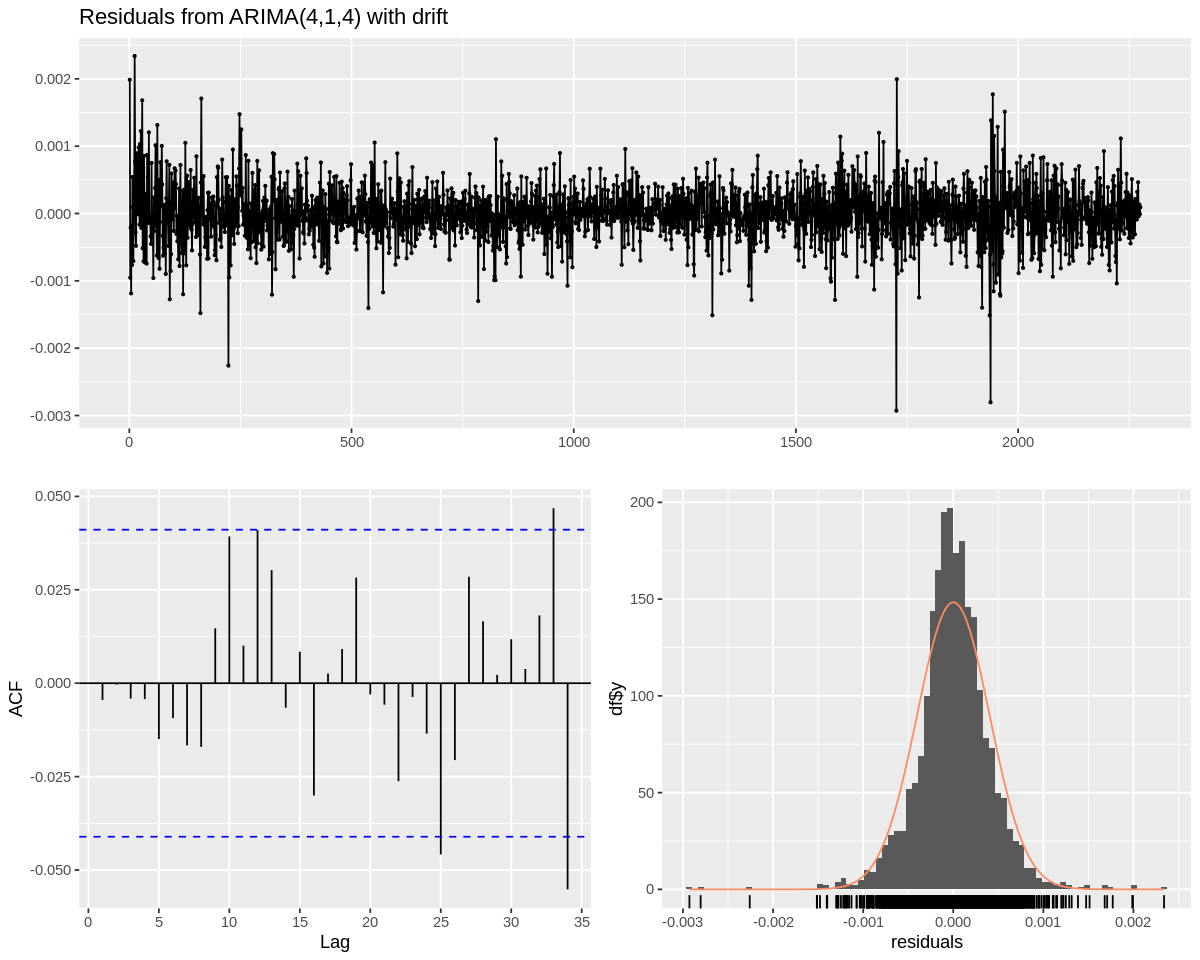

In [112]:
checkresiduals(fit)

In [113]:
res <- fit$residuals

In [117]:
Box.test(res, type="Ljung-Box", lag=11, fitdf=3)


	Box-Ljung test

data:  res
X-squared = 6.3861, df = 8, p-value = 0.6041


In [118]:
my.figsize(10,4)

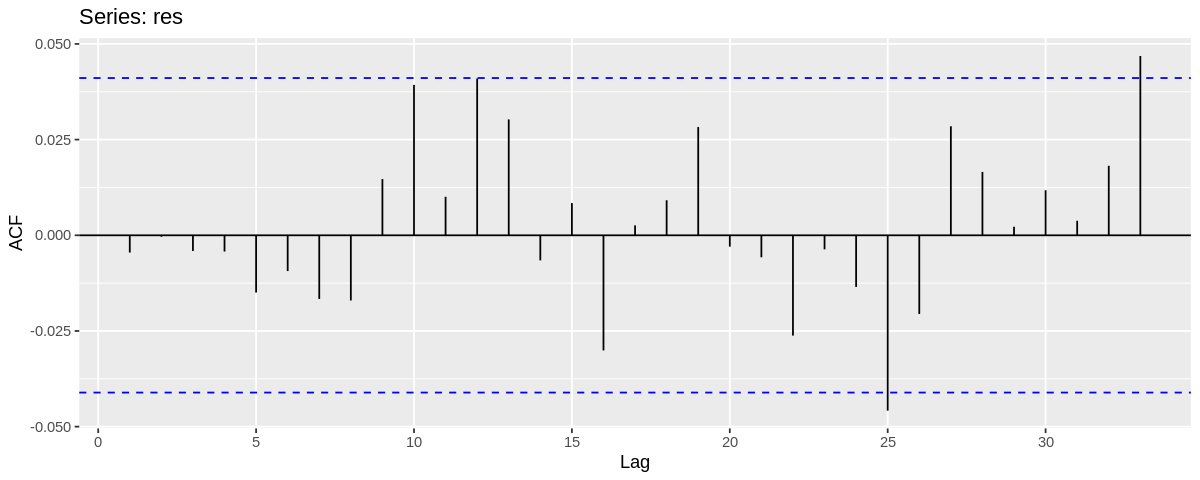

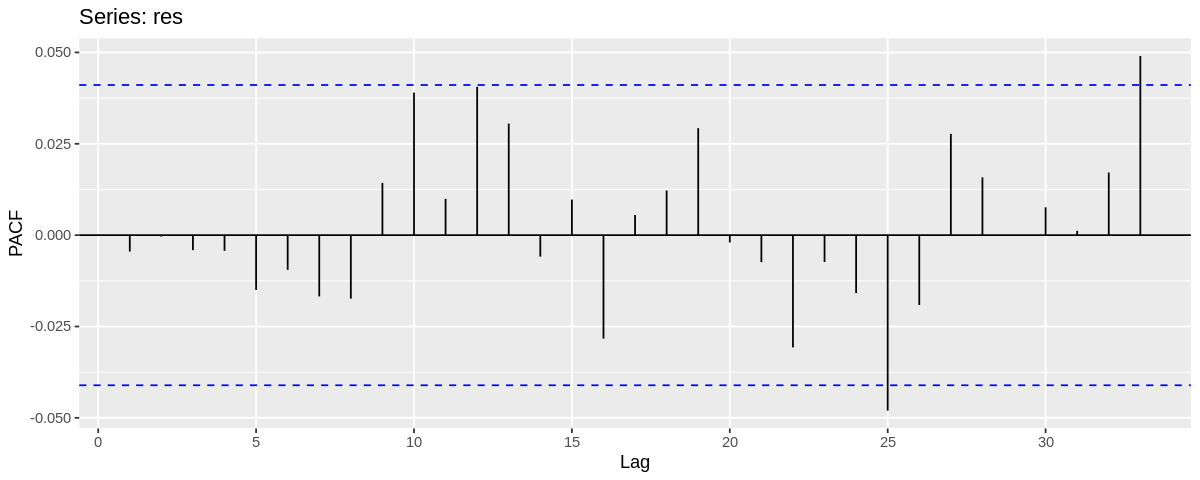

In [119]:
ggAcf(res); ggPacf(res)

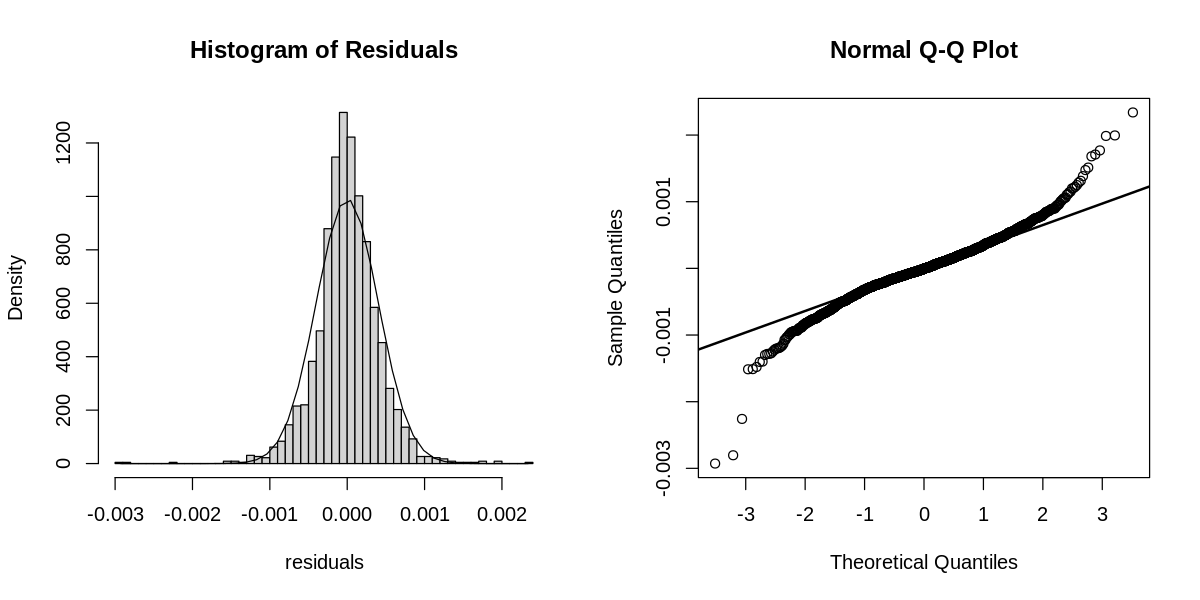

In [120]:
my.figsize(10,5)
par(mfrow=c(1,2))

hist(res, breaks=50, prob=TRUE, xlab='residuals', main='Histogram of Residuals')
x <- seq(min(res), max(res), length.out=40)
y <- dnorm(x, mean=mean(res), sd=sd(res))
lines(x,y)

qqnorm(res, pch=21)
qqline(res, lwd=2)

#### Forecast

In [324]:
my.figsize(12,7)

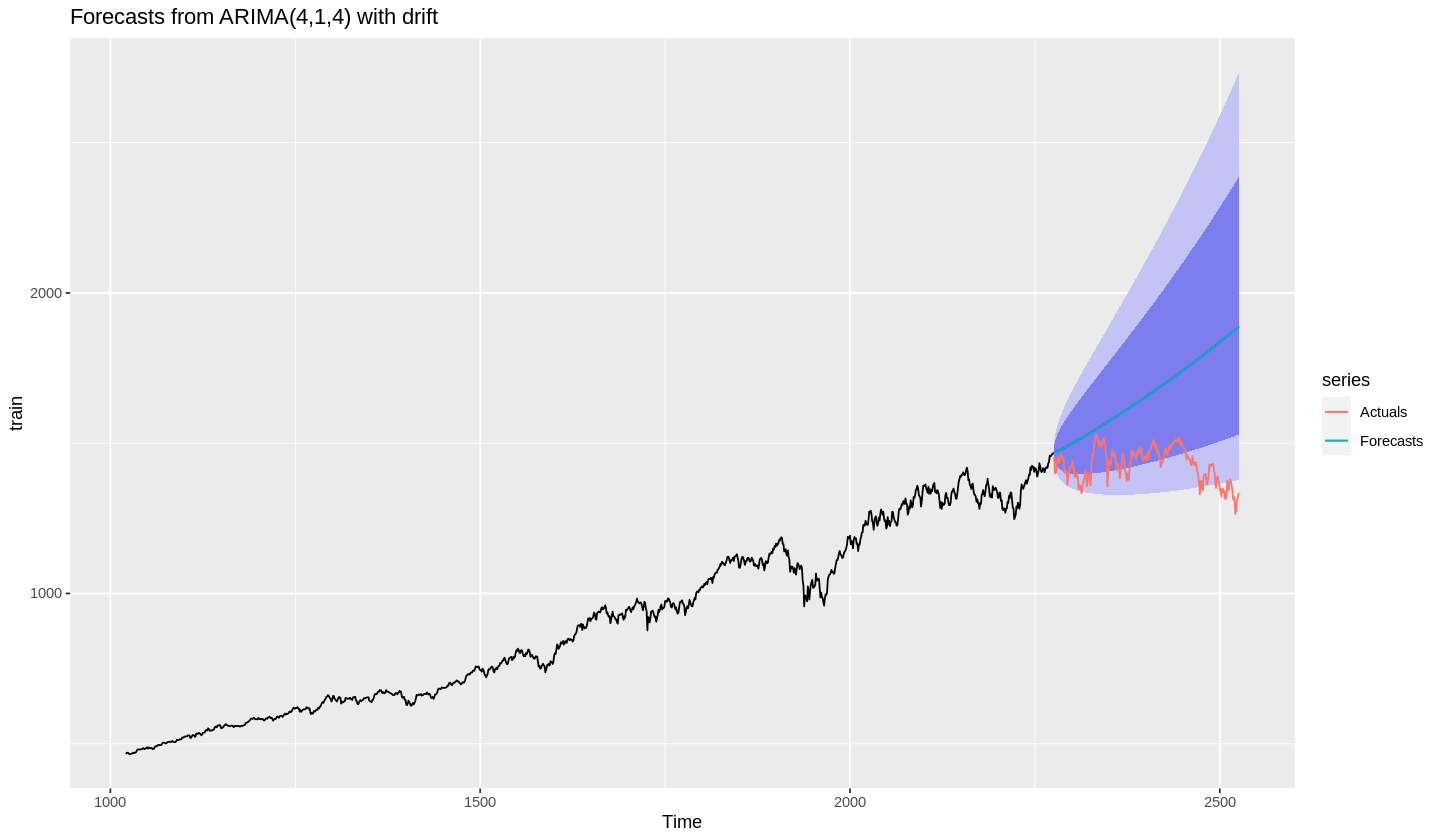

In [325]:
u.plot_forecast(fit, 251, 5*251, test)

## Cross Validation

In [9]:
train_end <- '1999-12-31'

test_start <- '2000-01-01'
test_end <- '2000-12-31'

#test_start <- '2010-01-01'
#test_end <- '2010-12-31'

train <- window(spx, end=c(as.Date(train_end)))
test <- window(spx, start=c(as.Date(test_start)), end=c(as.Date(test_end)))
#head(train); tail(train); head(test); tail(test)

In [10]:
hori <- 252
peri <- floor(hori/2)
w <- 252*5

### Single ARIMA for CV
- reproduce coefs, aic's and accuracies which are same as those of auto.arma

In [122]:
fit <- Arima(train, order=c(4,1,4), 
             include.drift=TRUE, 
             lambda="auto")
fit
accuracy(fit)

Series: train 
ARIMA(4,1,4) with drift 
Box Cox transformation: lambda= -0.4701797 

Coefficients:
          ar1     ar2     ar3     ar4     ma1      ma2      ma3      ma4  drift
      -0.0214  0.5377  0.1584  0.0941  0.0282  -0.5364  -0.2142  -0.0997      0
s.e.   2.2709  0.3337  2.4051  1.2113  2.2667   0.3435   2.3529   1.2729      0

sigma^2 = 1.629e-07:  log likelihood = 14561.24
AIC=-29102.47   AICc=-29102.37   BIC=-29045.18

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.01769248,7.908443,4.779619,-0.001850004,0.6188589,0.9952085,-0.01538925


In [123]:
cv.forecast <- function(x, h) {
    forecast(Arima(x, order=c(4,1,4), include.drift=TRUE, lambda="auto"), h=h)
}

In [124]:
cv.result <- my.tsCV(train, cv.forecast, h=hori, window=w, step=peri)

[1] "11 % done."
[1] "22 % done."
[1] "33 % done."
[1] "44 % done."
[1] "56 % done."
[1] "67 % done."
[1] "78 % done."
[1] "89 % done."
[1] "100 % done."


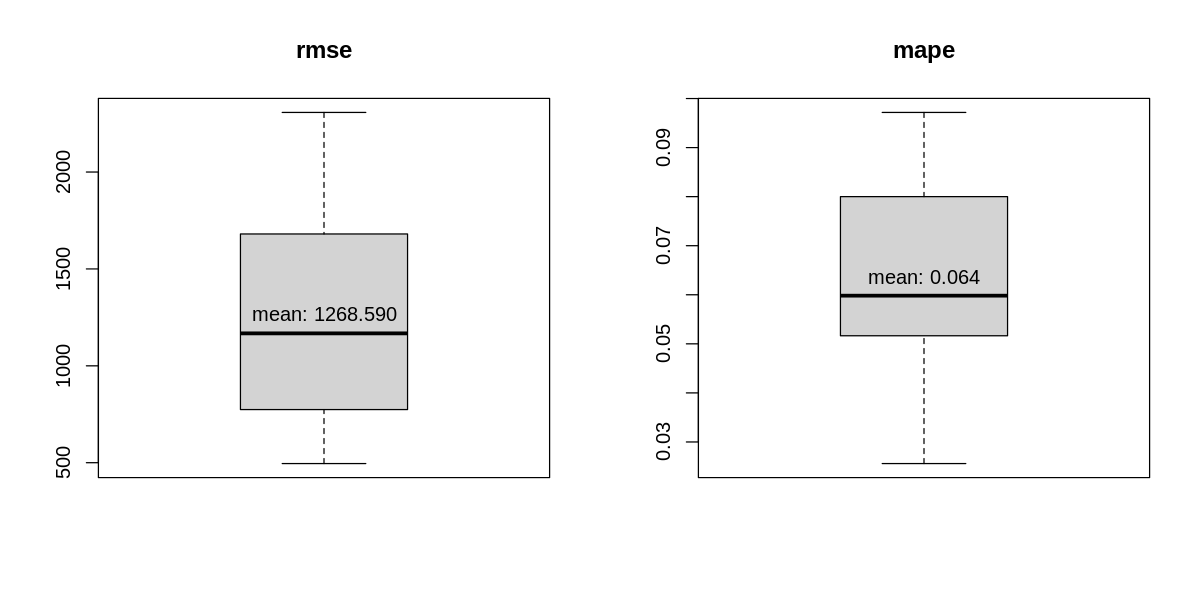

In [125]:
par(mfrow=c(1,2))
for (metric in c('rmse','mape')) {
    x <- cv.result[,metric]
    x <- na.omit(x)
    boxplot(x, main=metric)
    label <- sprintf("mean: %0.3f", mean(x))
    text(x=1, y=mean(x), labels=label)
    #legend('topleft', box.lty=0, inset=.02, bg="transparent", legend=label)
}

In [131]:
results <- n.get_result(cv.result, 1)

### Auto ARIMA

In [133]:
cv.forecast <- function(x, h) {
    forecast(auto.arima(x, trace=TRUE, ic='aicc', seasonal=FALSE, 
                        #allowdrift=TRUE, allowmean = TRUE, # default
                        lambda="auto",
                        #trace=FALSE # all NA if FALSE
                       ), h=h)
}

In [134]:
cv.result <- my.tsCV(train, cv.forecast, h=hori, window=w, step=peri)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : 9452.873
 ARIMA(0,1,0) with drift         : 9449.174
 ARIMA(1,1,0) with drift         : 9449.483
 ARIMA(0,1,1) with drift         : 9451.06
 ARIMA(0,1,0)                    : 9455.61
 ARIMA(1,1,1) with drift         : 9449.018
 ARIMA(2,1,1) with drift         : Inf
 ARIMA(1,1,2) with drift         : Inf
 ARIMA(0,1,2) with drift         : 9452.861
 ARIMA(2,1,0) with drift         : 9452.185
 ARIMA(1,1,1)                    : 9456.8

 Now re-fitting the best model(s) without approximations...

 ARIMA(1,1,1) with drift         : 9455.604

 Best model: ARIMA(1,1,1) with drift         

[1] "11 % done."

 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : -8721.787
 ARIMA(0,1,0) with drift         : -8720.878
 ARIMA(1,1,0) with drift         : -8722.636
 ARIMA(0,1,1) with drift         : -8720.169
 ARIMA(0,1,0)                    : -8716.05
 ARIMA(2,1,0)

In [139]:
results <- rbind(results, n.get_result(cv.result, 2))

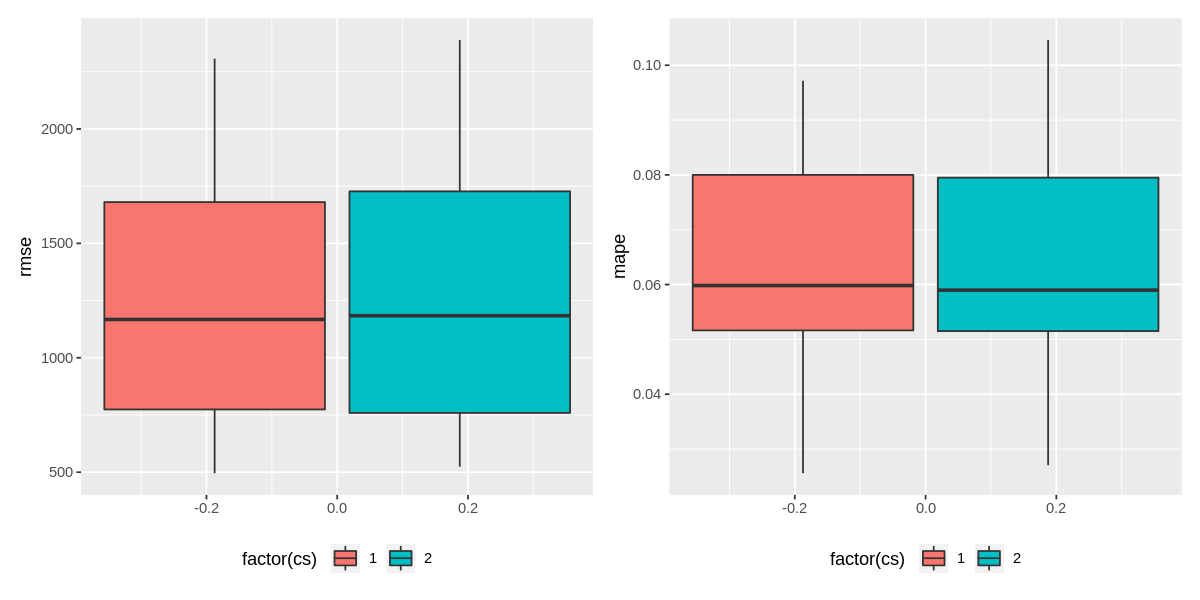

In [157]:
p1 <- (ggplot(results, aes(y=rmse, group=cs, fill = factor(cs))) 
  + geom_boxplot()
  + theme(legend.position="bottom")
)
p2 <- (ggplot(results, aes(y=mape, group=cs, fill = factor(cs))) 
  + geom_boxplot()
  + theme(legend.position="bottom")
)

p1 + p2

### CV for 30 years

In [177]:
train_end <- '2019-12-31'

test_start <- '2020-01-01'
test_end <- '2020-12-31'

train <- window(spx, end=c(as.Date(train_end)))
test <- window(spx, start=c(as.Date(test_start)), end=c(as.Date(test_end)))
#head(train); tail(train); head(test); tail(test)

In [178]:
tail(train)

           GSPC.Adjusted
2019-12-23       3224.01
2019-12-24       3223.38
2019-12-26       3239.91
2019-12-27       3240.02
2019-12-30       3221.29
2019-12-31       3230.78

In [179]:
hori <- 252
peri <- floor(hori/2)
w <- 252*5

In [180]:
cv.forecast <- function(x, h) {
    forecast(auto.arima(x, trace=TRUE, ic='aicc', seasonal=FALSE, 
                        #allowdrift=TRUE, allowmean = TRUE, # default
                        lambda="auto",
                        #trace=FALSE # all NA if FALSE
                       ), h=h)
}

In [181]:
cv.result <- my.tsCV(train, cv.forecast, h=hori, window=w, step=peri)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : 9452.873
 ARIMA(0,1,0) with drift         : 9449.174
 ARIMA(1,1,0) with drift         : 9449.483
 ARIMA(0,1,1) with drift         : 9451.06
 ARIMA(0,1,0)                    : 9455.61
 ARIMA(1,1,1) with drift         : 9449.018
 ARIMA(2,1,1) with drift         : Inf
 ARIMA(1,1,2) with drift         : Inf
 ARIMA(0,1,2) with drift         : 9452.861
 ARIMA(2,1,0) with drift         : 9452.185
 ARIMA(1,1,1)                    : 9456.8

 Now re-fitting the best model(s) without approximations...

 ARIMA(1,1,1) with drift         : 9455.604

 Best model: ARIMA(1,1,1) with drift         

[1] "2 % done."

 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : -8721.787
 ARIMA(0,1,0) with drift         : -8720.878
 ARIMA(1,1,0) with drift         : -8722.636
 ARIMA(0,1,1) with drift         : -8720.169
 ARIMA(0,1,0)                    : -8716.05
 ARIMA(2,1,0) 

In [182]:
results <- rbind(results, n.get_result(cv.result, 3))

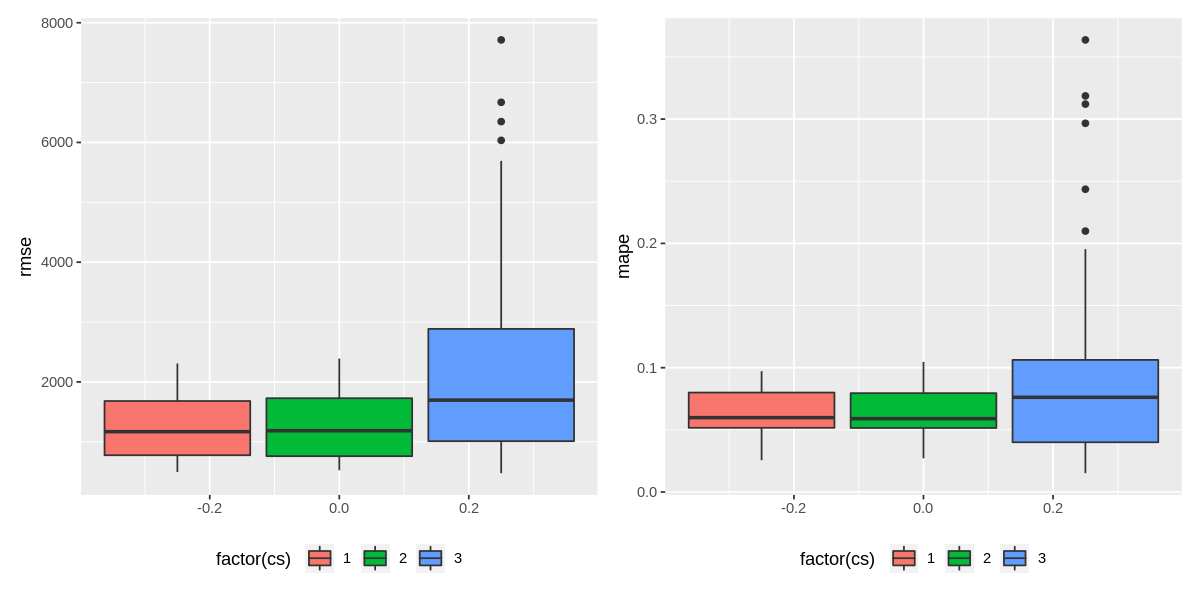

In [183]:
library(ggplot2)
library(patchwork)

p1 <- (ggplot(results, aes(y=rmse, group=cs, fill = factor(cs))) 
  + geom_boxplot()
  + theme(legend.position="bottom")
)
p2 <- (ggplot(results, aes(y=mape, group=cs, fill = factor(cs))) 
  + geom_boxplot()
  + theme(legend.position="bottom")
)

p1 + p2

### Tuning: Train Length

In [29]:
train_end <- '2019-12-31'
test_start <- '2020-01-01'
test_end <- '2020-12-31'

train <- window(spx, end=c(as.Date(train_end)))
test <- window(spx, start=c(as.Date(test_start)), end=c(as.Date(test_end)))

In [30]:
cv.forecast <- function(x, h) {
    forecast(auto.arima(x, trace=TRUE, ic='aicc', seasonal=FALSE, lambda="auto"), h=h)
}

In [31]:
hori <- 252
peri <- floor(hori/2)
#w <- 252*5

results <- NULL
for (y in c(3,5,7,9)) {
    w <- 252*y
    cv.result <- my.tsCV(train, cv.forecast, h=hori, window=w, step=peri)
    x <- n.get_result(cv.result, y)
    if (is.null(results)) 
        results <- x
    else
        results <- rbind(results, x)
}


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : 12755.52
 ARIMA(0,1,0) with drift         : 12750.88
 ARIMA(1,1,0) with drift         : 12751.93
 ARIMA(0,1,1) with drift         : 12752.8
 ARIMA(0,1,0)                    : 12752.26
 ARIMA(1,1,1) with drift         : 12751.96

 Now re-fitting the best model(s) without approximations...

 ARIMA(0,1,0) with drift         : 12764.94

 Best model: ARIMA(0,1,0) with drift         

[1] "2 % done."

 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : 12774.09
 ARIMA(0,1,0) with drift         : 12771.12
 ARIMA(1,1,0) with drift         : 12772.11
 ARIMA(0,1,1) with drift         : 12773.04
 ARIMA(0,1,0)                    : 12769.94
 ARIMA(1,1,1) with drift         : 12774.13

 Now re-fitting the best model(s) without approximations...

 ARIMA(0,1,0)                    : 12784.03

 Best model: ARIMA(0,1,0)                    

[1] "4 % done."

 Fitting m

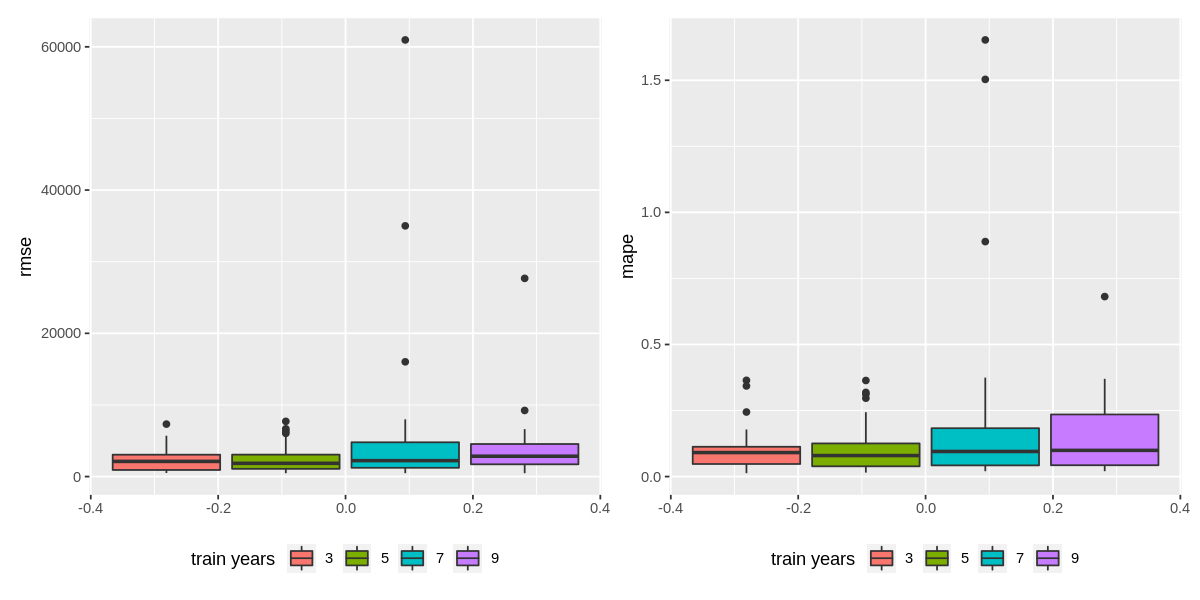

In [32]:
library(ggplot2)
library(patchwork)

p1 <- (ggplot(results, aes(y=rmse, group=cs, fill = factor(cs))) 
  + geom_boxplot()
  + theme(legend.position="bottom")
  + labs(fill='train years')
)
p2 <- (ggplot(results, aes(y=mape, group=cs, fill = factor(cs))) 
  + geom_boxplot()
  + theme(legend.position="bottom")
  + labs(fill='train years')
)

p1 + p2


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : 9930.146
 ARIMA(0,1,0) with drift         : 9932.137
 ARIMA(1,1,0) with drift         : 9930.881
 ARIMA(0,1,1) with drift         : 9933.446
 ARIMA(0,1,0)                    : 9932.717
 ARIMA(1,1,2) with drift         : 9931.542
 ARIMA(2,1,1) with drift         : 9930.296
 ARIMA(3,1,2) with drift         : 9930.294
 ARIMA(2,1,3) with drift         : 9931.305
 ARIMA(1,1,1) with drift         : 9931.652
 ARIMA(1,1,3) with drift         : 9932.843
 ARIMA(3,1,1) with drift         : 9932.817
 ARIMA(3,1,3) with drift         : 9931.443
 ARIMA(2,1,2)                    : 9931.105

 Now re-fitting the best model(s) without approximations...

 ARIMA(2,1,2) with drift         : 9936.976

 Best model: ARIMA(2,1,2) with drift         



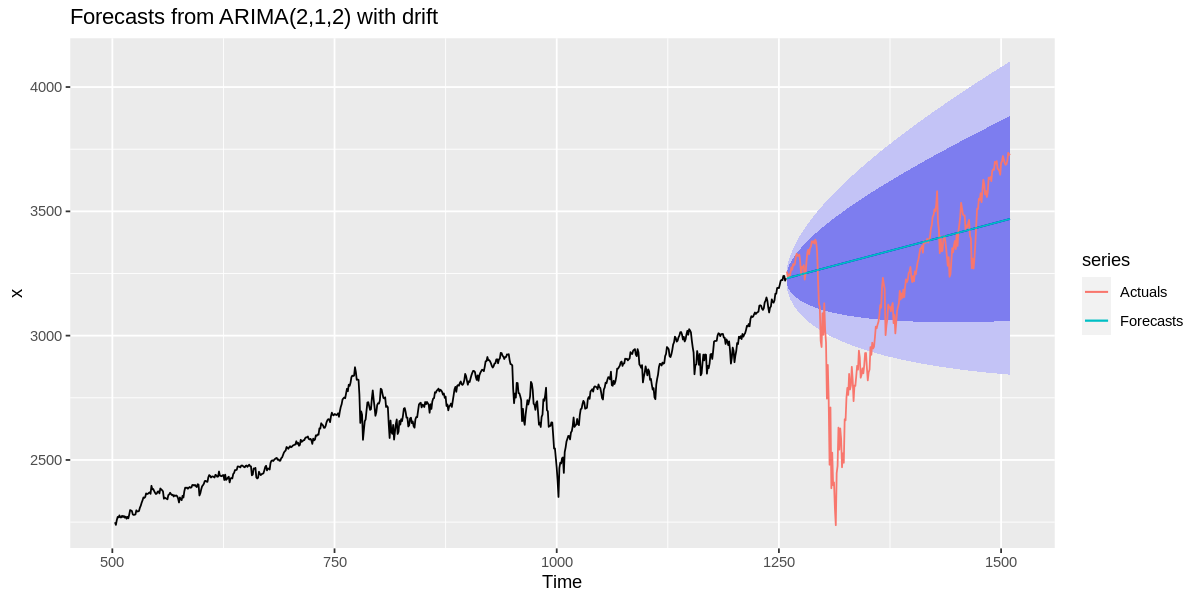

In [61]:
x <- window(train, start=c(as.Date('2015-01-01')))
fit <- auto.arima(x, trace=TRUE, ic='aicc', seasonal=FALSE, lambda="auto")
my.plot_forecast(fit, 252, 252*3, test)

# Compare Models

## Setting

In [10]:
train_end <- '2019-12-31'

test_start <- '2020-01-01'
test_end <- '2020-12-31'

train <- window(spx, end=c(as.Date(train_end)))
test <- window(spx, start=c(as.Date(test_start)), end=c(as.Date(test_end)))

In [11]:
hori <- 252
peri <- floor(hori/2)
w <- 252*5

## Model 1

In [12]:
cv.forecast <- function(x, h) {
    forecast(auto.arima(x, trace=TRUE, ic='aicc', seasonal=FALSE, 
                        #allowdrift=TRUE, allowmean = TRUE, # default
                        lambda="auto"), h=h)
}

In [31]:
results.m01.b <- my.tsCV(train, cv.forecast, h=hori, window=w, step=peri)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : 9452.873
 ARIMA(0,1,0) with drift         : 9449.174
 ARIMA(1,1,0) with drift         : 9449.483
 ARIMA(0,1,1) with drift         : 9451.06
 ARIMA(0,1,0)                    : 9455.61
 ARIMA(1,1,1) with drift         : 9449.018
 ARIMA(2,1,1) with drift         : Inf
 ARIMA(1,1,2) with drift         : Inf
 ARIMA(0,1,2) with drift         : 9452.861
 ARIMA(2,1,0) with drift         : 9452.185
 ARIMA(1,1,1)                    : 9456.8

 Now re-fitting the best model(s) without approximations...

 ARIMA(1,1,1) with drift         : 9455.604

 Best model: ARIMA(1,1,1) with drift         

[1] "2 % done."

 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : -8721.787
 ARIMA(0,1,0) with drift         : -8720.878
 ARIMA(1,1,0) with drift         : -8722.636
 ARIMA(0,1,1) with drift         : -8720.169
 ARIMA(0,1,0)                    : -8716.05
 ARIMA(2,1,0) 

In [ ]:
#results <- rbind(results, n.get_result(cv.result, 2))
r1 <- n.get_result(results.m01.b, 'Base')
n.plot_errors(r1)

### Compare with Normalization

In [16]:
train1n <- my.minmaxscale(train)
head(train1n)

           GSPC.Adjusted
1991-01-02    -0.6642147
1991-01-03    -0.6673153
1991-01-04    -0.6679368
1991-01-07    -0.6717339
1991-01-08    -0.6721027
1991-01-09    -0.6744315

In [34]:
results.m01 <- my.tsCV(train1n, cv.forecast, h=hori, window=w, step=peri)

Normalized result shows smaller rmse & more mape than base result since abs values scaled to less than 1

In [ ]:
r2 <- n.get_result(results.m01, 'Normalized')

results.tmp <- rbind(r1, r2)
n.plot_errors(results.tmp)

In [ ]:
n.plot_errors(r2)

In [ ]:
results <- r2

## Model 2
- Regression with ARIMA errors in R

### Prepare Regression Data

In [12]:
head(GSPC)

           GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume GSPC.Adjusted
1991-01-02    330.20    330.75   326.45     326.45   126280000        326.45
1991-01-03    326.46    326.53   321.90     321.91   141450000        321.91
1991-01-04    321.91    322.35   318.87     321.00   140820000        321.00
1991-01-07    320.97    320.97   315.44     315.44   130610000        315.44
1991-01-08    315.44    316.97   313.79     314.90   143390000        314.90
1991-01-09    314.90    320.73   310.93     311.49   191100000        311.49

In [13]:
vol <- GSPC$GSPC.Volume
#vol.train <- vol

In [14]:
#window(spx, start=c(as.Date(test_start)), end=c(as.Date(test_end)))

In [15]:
head(train)

           GSPC.Adjusted
1991-01-02        326.45
1991-01-03        321.91
1991-01-04        321.00
1991-01-07        315.44
1991-01-08        314.90
1991-01-09        311.49

In [16]:
#class(train[1,0]); class(train)

#index(train)

train2 <- merge(train, vol, join='left', fill=NA)
colnames(train2) <- c('snp.close','snp.vol')

colSums(is.na(train2))
head(train2)

snp.close   snp.vol 
        0         0

           snp.close   snp.vol
1991-01-02    326.45 126280000
1991-01-03    321.91 141450000
1991-01-04    321.00 140820000
1991-01-07    315.44 130610000
1991-01-08    314.90 143390000
1991-01-09    311.49 191100000

#### Normalization

In [17]:
train2n <- n.minmaxscale(train2)
head(train2n)

            snp.close    snp.vol
1991-01-02 -0.6642147 -0.3724518
1991-01-03 -0.6673153 -0.3697999
1991-01-04 -0.6679368 -0.3699101
1991-01-07 -0.6717339 -0.3716948
1991-01-08 -0.6721027 -0.3694608
1991-01-09 -0.6744315 -0.3611208

### OLS/GLS

In [110]:
a <- train2n[,1]
b <- train2n[,2]
reg <- lm(a~b)
summary(reg)


Call:
lm(formula = a ~ b)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.56941 -0.27841 -0.02718  0.19457  1.44954 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.211e-16  4.425e-03    0.00        1    
b           8.061e-01  1.449e-02   55.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3782 on 7304 degrees of freedom
Multiple R-squared:  0.2976,	Adjusted R-squared:  0.2975 
F-statistic:  3095 on 1 and 7304 DF,  p-value: < 2.2e-16


In [113]:
gls <- gls(a~b, correlation=corARMA(p=1,q=0), method='ML')
summary(gls)

ERROR: Error in `dimnames<-.xts`(`*tmp*`, value = dn): length of 'dimnames' [2] not equal to array extent


In [ ]:
gls <- gls(a~b, correlation=corARMA(p=1,q=1), method='ML')
summary(gls)

### Define Forecast Function 
- to include regression data

In [40]:
cv.forecast <- function(x, h, xreg=NULL) {
    if (!is.null(xreg)) {
        xreg.h <- rep(mean(xreg),h)
        xreg.h <- data.frame(xreg.h)
        colnames(xreg.h) <- colnames(xreg)
        xreg.h <- ts(xreg.h)
    } else {
        xreg.h <- NULL
    }
    
    forecast(auto.arima(x, trace=TRUE, ic='aicc', seasonal=FALSE, 
                        xreg=xreg, lambda="auto"), h=h, xreg=xreg.h)
}

#### Testing the fucntion

In [18]:
x.train <- window(train2, end=c(as.Date('1995-12-31')))
x.test <- window(train2, start=c(as.Date('1996-01-01')), end=c(as.Date('1996-12-31')))
c.train <- x.train$snp.close
r <- x.train$snp.vol
c.test <- x.test$snp.close

fc1 <- cv.forecast(c.train, 252, NULL)
fc2 <- cv.forecast(c.train, 252, r)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : 9645.052
 ARIMA(0,1,0) with drift         : 9641.368
 ARIMA(1,1,0) with drift         : 9641.68
 ARIMA(0,1,1) with drift         : 9643.25
 ARIMA(0,1,0)                    : 9648.057
 ARIMA(1,1,1) with drift         : 9641.213
 ARIMA(2,1,1) with drift         : Inf
 ARIMA(1,1,2) with drift         : Inf
 ARIMA(0,1,2) with drift         : 9645.021
 ARIMA(2,1,0) with drift         : 9644.356
 ARIMA(1,1,1)                    : 9649.269

 Now re-fitting the best model(s) without approximations...

 ARIMA(1,1,1) with drift         : 9647.924

 Best model: ARIMA(1,1,1) with drift         


 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : 9634.695
 Regression with ARIMA(0,1,0) errors : Inf
 Regression with ARIMA(1,1,0) errors : 9631.441
 Regression with ARIMA(0,1,1) errors : 9633.136
 Regression with ARIMA(0,1,0) errors : 9637.89
 Regression with A

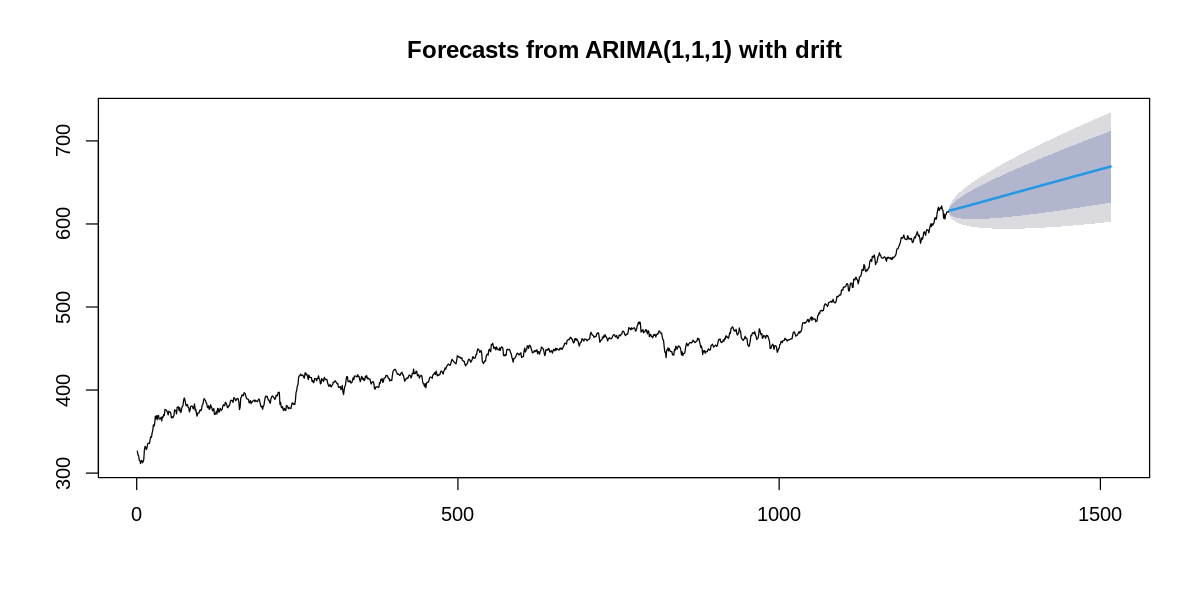

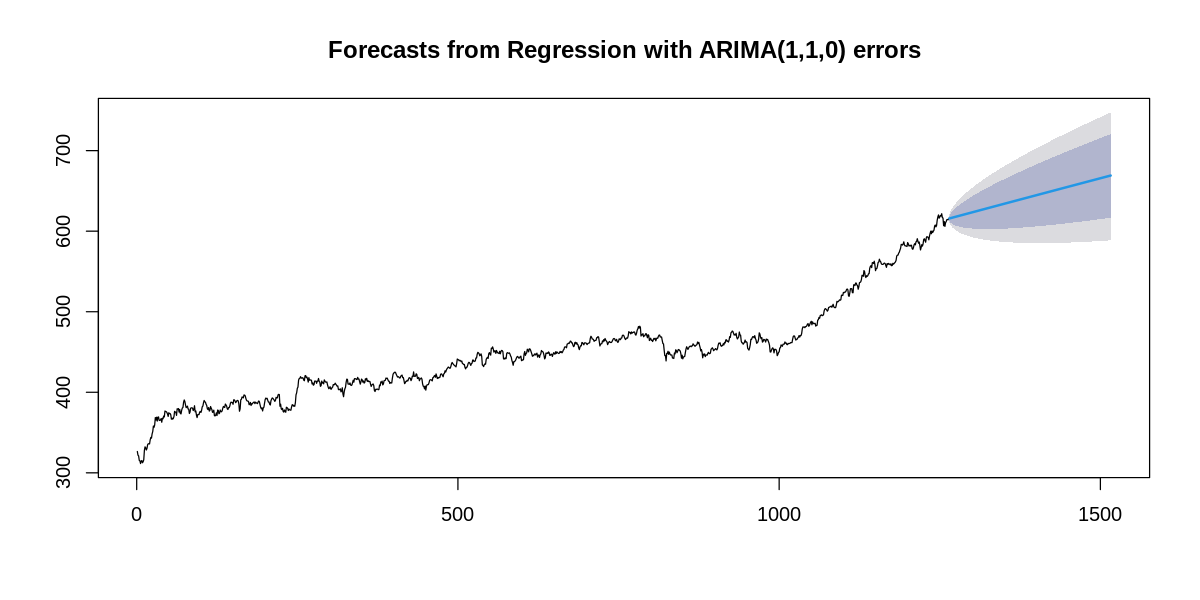

In [19]:
#par(mfrow=c(2,1))
plot(fc1)
plot(fc2)

In [29]:
head(train2$snp.close)

           snp.close
1991-01-02    326.45
1991-01-03    321.91
1991-01-04    321.00
1991-01-07    315.44
1991-01-08    314.90
1991-01-09    311.49

In [31]:
str(train2)

An ‘xts’ object on 1991-01-02/2019-12-31 containing:
  Data: num [1:7306, 1:2] 326 322 321 315 315 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "snp.close" "snp.vol"
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
List of 2
 $ src    : chr "yahoo"
 $ updated: POSIXct[1:1], format: "2022-08-29 14:53:51"


In [32]:
str(train2n)

 num [1:7306, 1:2] -0.664 -0.667 -0.668 -0.672 -0.672 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:7306] "1991-01-02" "1991-01-03" "1991-01-04" "1991-01-07" ...
  ..$ : chr [1:2] "snp.close" "snp.vol"
 - attr(*, "scaled:center")= Named num [1:2] 1.30e+03 2.26e+09
  ..- attr(*, "names")= chr [1:2] "snp.close" "snp.vol"
 - attr(*, "scaled:scale")= Named num [1:2] 1.46e+03 5.72e+09
  ..- attr(*, "names")= chr [1:2] "snp.close" "snp.vol"


In [34]:
as.xts(train2n)$snp.close

               snp.close
1991-01-02 -6.642147e-01
1991-01-03 -6.673153e-01
1991-01-04 -6.679368e-01
1991-01-07 -6.717339e-01
1991-01-08 -6.721027e-01
1991-01-09 -6.744315e-01
1991-01-10 -6.723554e-01
1991-01-11 -6.718773e-01
1991-01-14 -6.737486e-01
1991-01-15 -6.729017e-01
1991-01-16 -6.712353e-01
1991-01-17 -6.631767e-01
1991-01-18 -6.602674e-01
1991-01-21 -6.610664e-01
1991-01-22 -6.629445e-01
1991-01-23 -6.616469e-01
1991-01-24 -6.585259e-01
1991-01-25 -6.576449e-01
1991-01-28 -6.576722e-01
1991-01-29 -6.578020e-01
1991-01-30 -6.543395e-01
1991-01-31 -6.522770e-01
1991-02-01 -6.528780e-01
1991-02-04 -6.492653e-01
1991-02-05 -6.472711e-01
1991-02-06 -6.426203e-01
1991-02-07 -6.436789e-01
1991-02-08 -6.417461e-01
1991-02-11 -6.354426e-01
1991-02-12 -6.375461e-01
1991-02-13 -6.351422e-01
1991-02-14 -6.384202e-01
1991-02-15 -6.351148e-01
1991-02-19 -6.348895e-01
1991-02-20 -6.377919e-01
1991-02-21 -6.379080e-01
1991-02-22 -6.374436e-01
1991-02-25 -6.363441e-01
1991-02-26 -6.393832e-01


### CV

In [41]:
results.m02 <- my.tsCV(train2n$snp.close, cv.forecast, h=hori, window=w, step=peri,
                      xreg=train2n$snp.vol)


 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : -13532.4
 Regression with ARIMA(0,1,0) errors : -13533.8
 Regression with ARIMA(1,1,0) errors : -13534.75
 Regression with ARIMA(0,1,1) errors : -13531.87
 Regression with ARIMA(0,1,0) errors : -13528.05
 Regression with ARIMA(2,1,0) errors : -13532.76
 Regression with ARIMA(1,1,1) errors : -13535.78
 Regression with ARIMA(2,1,1) errors : Inf
 Regression with ARIMA(1,1,2) errors : Inf
 Regression with ARIMA(0,1,2) errors : -13530.76
 Regression with ARIMA(1,1,1) errors : -13528.92

 Now re-fitting the best model(s) without approximations...

 Regression with ARIMA(1,1,1) errors : -13545.57

 Best model: Regression with ARIMA(1,1,1) errors 

[1] "2 % done."

 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : -13547.05
 Regression with ARIMA(0,1,0) errors : -13547.82
 Regression with ARIMA(1,1,0) errors : -13548.97
 Regression with ARIMA(0,1,

In [40]:
results.m02 <- my.tsCV(train2$snp.close, cv.forecast, h=hori, window=w, step=peri,
                      xreg=train2$snp.vol)


 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : 9442.297
 Regression with ARIMA(0,1,0) errors : Inf
 Regression with ARIMA(1,1,0) errors : 9439.033
 Regression with ARIMA(0,1,1) errors : 9440.737
 Regression with ARIMA(0,1,0) errors : 9445.24
 Regression with ARIMA(2,1,0) errors : 9441.374
 Regression with ARIMA(1,1,1) errors : Inf
 Regression with ARIMA(2,1,1) errors : Inf
 Regression with ARIMA(1,1,0) errors : Inf

 Now re-fitting the best model(s) without approximations...

 Regression with ARIMA(1,1,0) errors : 9445.4

 Best model: Regression with ARIMA(1,1,0) errors 

[1] "2 % done."

 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : Inf
 Regression with ARIMA(0,1,0) errors : Inf
 Regression with ARIMA(1,1,0) errors : Inf
 Regression with ARIMA(0,1,1) errors : Inf
 Regression with ARIMA(0,1,0) errors : -8715.58
 Regression with ARIMA(1,1,1) errors : Inf

 Now re-fitting the best mo

In [41]:
results <- rbind(results, n.get_result(results.m02, 2))

In [ ]:
n.plot_errors(results)

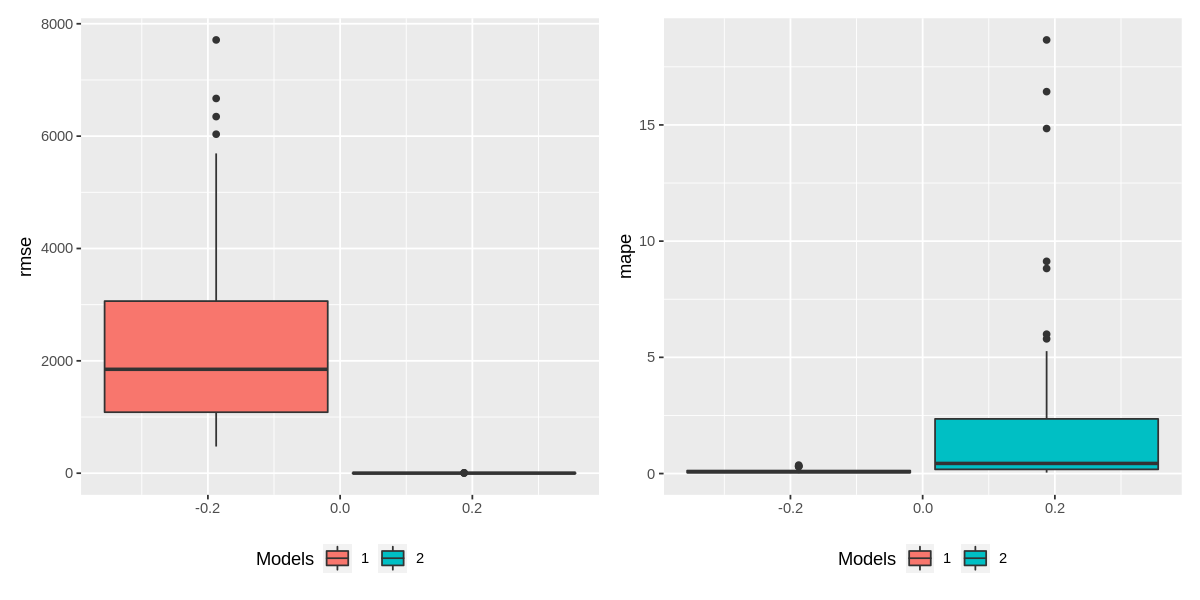

In [47]:
results <- n.get_result(results.m01, 1)
results <- rbind(results, n.get_result(results.m02, 2))
n.plot_errors(results)

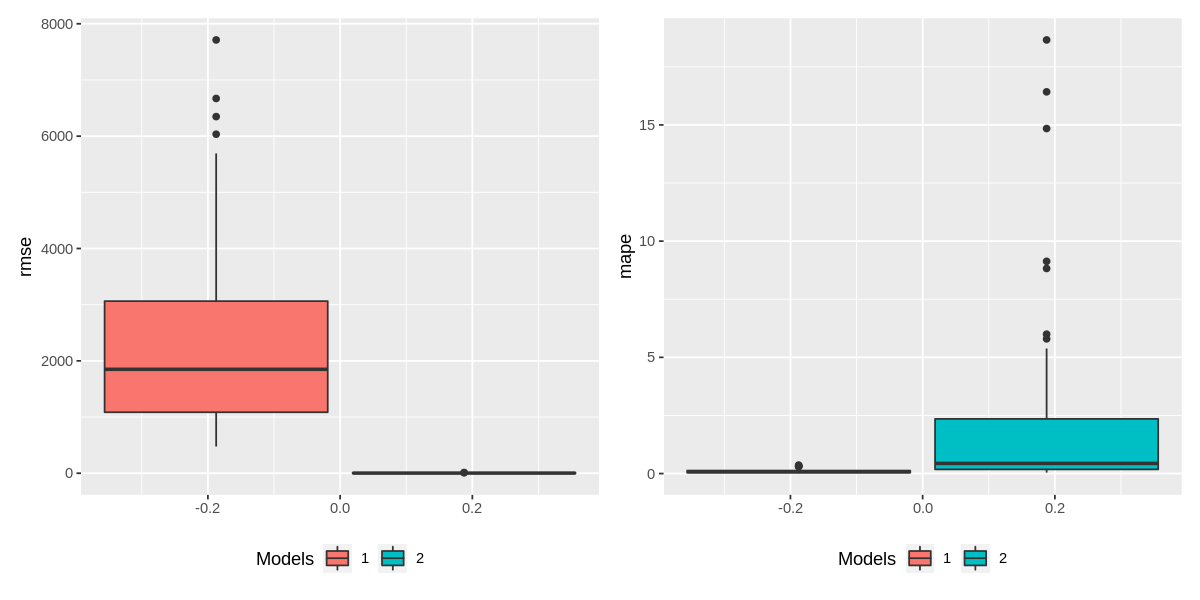

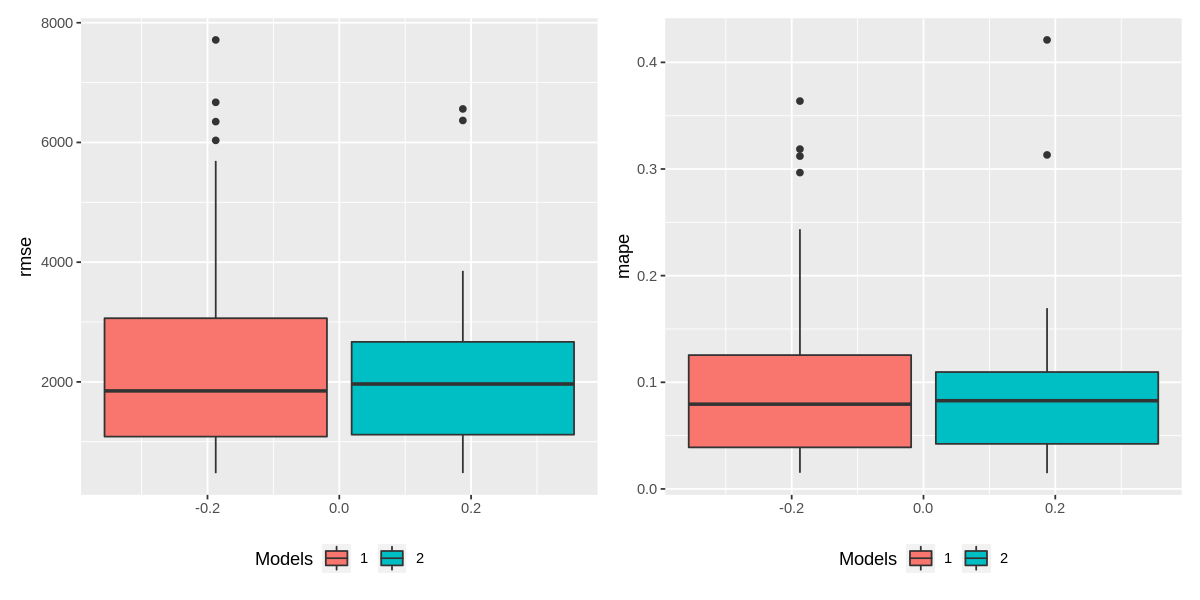

## Model 3
- Regression with ARIMA errors in R
- multiple vars for regression

### Prepare Regression Data

S&P 500 Volume

In [48]:
vol <- GSPC$GSPC.Volume

#### Nasdaq Composite

In [49]:
n.symbol <- "^IXIC"
nas <- getSymbols(n.symbol, from=n.start, to=n.end, auto.assign = FALSE)
head(nas); tail(nas)

           IXIC.Open IXIC.High IXIC.Low IXIC.Close IXIC.Volume IXIC.Adjusted
1991-01-02     373.0     373.5    371.8      372.2    92020000         372.2
1991-01-03     371.2     371.8    367.4      367.5   108390000         367.5
1991-01-04     366.5     367.9    365.9      367.2   103830000         367.2
1991-01-07     363.5     365.8    360.1      360.2   109460000         360.2
1991-01-08     359.1     360.5    358.2      359.0   111730000         359.0
1991-01-09     362.4     365.0    357.1      357.5   145780000         357.5

           IXIC.Open IXIC.High IXIC.Low IXIC.Close IXIC.Volume IXIC.Adjusted
2020-12-22  12785.22  12840.57 12695.31   12807.92  5700760000      12807.92
2020-12-23  12834.94  12841.92 12758.67   12771.11  7028650000      12771.11
2020-12-24  12791.54  12833.55 12767.64   12804.73  3305950000      12804.73
2020-12-28  12914.64  12930.89 12827.45   12899.42  5076340000      12899.42
2020-12-29  12965.39  12973.33 12821.96   12850.22  4680780000      12850.22
2020-12-30  12906.51  12924.93 12857.76   12870.00  5292210000      12870.00

In [50]:
nas.adj <- nas$IXIC.Adjusted
sum(is.na(nas.adj))

[1] 0

#### Gold

In [51]:
library(Quandl)

n.symbol <- "LBMA/GOLD"
gold <- Quandl(n.symbol, start_date=n.start, end_date=n.end, order='asc', type='xts')
head(gold); tail(gold)

           USD (AM) USD (PM) GBP (AM) GBP (PM) EURO (AM) EURO (PM)
1991-01-02   392.50    390.8   202.48   200.93        NA        NA
1991-01-03   386.75    386.3   198.74   198.43        NA        NA
1991-01-04   388.10    387.4   199.35   199.85        NA        NA
1991-01-07   391.00    391.1   205.25   205.54        NA        NA
1991-01-08   392.80    389.7   206.19   204.55        NA        NA
1991-01-09   390.70    387.1   205.38   201.35        NA        NA

           USD (AM) USD (PM) GBP (AM) GBP (PM) EURO (AM) EURO (PM)
2020-12-22  1873.30   1877.1  1399.73  1405.95   1532.73   1538.10
2020-12-23  1867.10   1875.0  1390.06  1382.44   1532.14   1535.06
2020-12-24  1872.55       NA  1376.14       NA   1535.87        NA
2020-12-29  1873.90   1874.3  1388.93  1389.42   1529.66   1528.49
2020-12-30  1877.55   1887.6  1381.31  1387.39   1528.89   1535.19
2020-12-31  1891.10       NA  1382.58       NA   1539.92        NA

In [52]:
gold.usdam <- gold[,1]
sum(is.na(gold.usdam))

[1] 0

#### WTI

In [53]:
n.symbol <- "DCOILWTICO"
# from & end do not work with src "FRED"
wti <- getSymbols(n.symbol, auto.assign = FALSE, from=n.start, to=n.end, src = "FRED")
wti <- window(wti, start=n.start, end=n.end)
head(wti); tail(wti)

           DCOILWTICO
1991-01-01         NA
1991-01-02      26.53
1991-01-03      25.61
1991-01-04      24.88
1991-01-07      27.25
1991-01-08      27.50

           DCOILWTICO
2020-12-24      48.18
2020-12-25         NA
2020-12-28      47.50
2020-12-29      47.85
2020-12-30      48.24
2020-12-31      48.35

In [54]:
wti[wti<0]
window(wti, start='2020-04-15', end='2020-04-25')

           DCOILWTICO
2020-04-20     -36.98

           DCOILWTICO
2020-04-15      19.96
2020-04-16      19.82
2020-04-17      18.31
2020-04-20     -36.98
2020-04-21       8.91
2020-04-22      13.64
2020-04-23      15.06
2020-04-24      15.99

In [55]:
wti['2020-04-20'] <- 0
wti[wti<0]

     DCOILWTICO

In [56]:
train2 <- merge(train, vol, join='left', fill=NA)
colnames(train2) <- c('snp.close','snp.vol')

colSums(is.na(train2))
head(train2)

snp.close   snp.vol 
        0         0

           snp.close   snp.vol
1991-01-02    326.45 126280000
1991-01-03    321.91 141450000
1991-01-04    321.00 140820000
1991-01-07    315.44 130610000
1991-01-08    314.90 143390000
1991-01-09    311.49 191100000

#### Combine Data

In [57]:
train2 <- merge(train, vol, join='left', fill=NA)
train2 <- merge(train2, nas.adj, join='left', fill=NA)
train2 <- merge(train2, gold.usdam, join='left', fill=NA)
train2 <- merge(train2, wti, join='left', fill=NA)

colnames(train2) <- c('snp.close','snp.vol','nasdaq','gold','wti')

colSums(is.na(train2))
head(train2)

snp.close   snp.vol    nasdaq      gold       wti 
        0         0         0       130        28

           snp.close   snp.vol nasdaq   gold   wti
1991-01-02    326.45 126280000  372.2 392.50 26.53
1991-01-03    321.91 141450000  367.5 386.75 25.61
1991-01-04    321.00 140820000  367.2 388.10 24.88
1991-01-07    315.44 130610000  360.2 391.00 27.25
1991-01-08    314.90 143390000  359.0 392.80 27.50
1991-01-09    311.49 191100000  357.5 390.70 28.00

In [58]:
colSums(is.na(train2))

snp.close   snp.vol    nasdaq      gold       wti 
        0         0         0       130        28

In [59]:
tail(train2[is.na(train2$gold)])
tail(train2[is.na(train2$wti)])

           snp.close    snp.vol  nasdaq gold   wti
2018-08-27   2896.74 2854080000 8017.90   NA 69.97
2018-12-26   2467.70 4233990000 6554.36   NA 46.04
2019-04-22   2907.97 2997950000 8015.27   NA 65.66
2019-05-06   2932.47 3181520000 8123.29   NA 62.30
2019-08-26   2878.38 2857600000 7853.74   NA 53.54
2019-12-26   3239.91 2160680000 9022.39   NA 61.72

           snp.close    snp.vol  nasdaq    gold wti
2017-07-03   2429.01 1962290000 6110.06 1235.20  NA
2018-11-23   2632.56 1651650000 6938.98 1222.15  NA
2018-12-24   2351.10 2613930000 6192.92 1261.25  NA
2018-12-31   2506.85 3442870000 6635.28 1281.65  NA
2019-07-05   2990.41 2434210000 8161.79 1414.40  NA
2019-11-11   3087.01 3035530000 8464.28 1465.50  NA

In [60]:
window(train2, start='2019-12-20', end='2020-01-01')
window(train2, start='2019-11-03', end='2019-11-15')

           snp.close    snp.vol  nasdaq    gold   wti
2019-12-20   3221.22 6454270000 8924.96 1476.90 60.43
2019-12-23   3224.01 3060610000 8945.65 1483.95 60.51
2019-12-24   3223.38 1296540000 8952.88 1490.85 61.17
2019-12-26   3239.91 2160680000 9022.39      NA 61.72
2019-12-27   3240.02 2428670000 9006.62 1510.60 61.76
2019-12-30   3221.29 3013290000 8945.99 1511.50 61.66
2019-12-31   3230.78 2893810000 8972.60 1523.00 61.14

           snp.close    snp.vol  nasdaq    gold   wti
2019-11-04   3078.27 4146850000 8433.20 1509.20 56.33
2019-11-05   3074.62 4486130000 8434.68 1504.60 57.04
2019-11-06   3076.78 4458190000 8410.63 1488.55 56.15
2019-11-07   3085.18 4144640000 8434.52 1484.10 56.91
2019-11-08   3093.08 3499150000 8475.31 1466.85 57.02
2019-11-11   3087.01 3035530000 8464.28 1465.50    NA
2019-11-12   3091.84 3466010000 8486.09 1455.00 56.67
2019-11-13   3094.04 3509280000 8482.10 1463.45 56.88
2019-11-14   3096.63 3276070000 8479.02 1467.65 56.57
2019-11-15   3120.46 3335650000 8540.83 1465.60 57.54

In [61]:
train2 <- na.locf(train2)

In [62]:
window(train2, start='2019-12-20', end='2020-01-01')
window(train2, start='2019-11-03', end='2019-11-15')

           snp.close    snp.vol  nasdaq    gold   wti
2019-12-20   3221.22 6454270000 8924.96 1476.90 60.43
2019-12-23   3224.01 3060610000 8945.65 1483.95 60.51
2019-12-24   3223.38 1296540000 8952.88 1490.85 61.17
2019-12-26   3239.91 2160680000 9022.39 1490.85 61.72
2019-12-27   3240.02 2428670000 9006.62 1510.60 61.76
2019-12-30   3221.29 3013290000 8945.99 1511.50 61.66
2019-12-31   3230.78 2893810000 8972.60 1523.00 61.14

           snp.close    snp.vol  nasdaq    gold   wti
2019-11-04   3078.27 4146850000 8433.20 1509.20 56.33
2019-11-05   3074.62 4486130000 8434.68 1504.60 57.04
2019-11-06   3076.78 4458190000 8410.63 1488.55 56.15
2019-11-07   3085.18 4144640000 8434.52 1484.10 56.91
2019-11-08   3093.08 3499150000 8475.31 1466.85 57.02
2019-11-11   3087.01 3035530000 8464.28 1465.50 57.02
2019-11-12   3091.84 3466010000 8486.09 1455.00 56.67
2019-11-13   3094.04 3509280000 8482.10 1463.45 56.88
2019-11-14   3096.63 3276070000 8479.02 1467.65 56.57
2019-11-15   3120.46 3335650000 8540.83 1465.60 57.54

#### Normalization

In [63]:
train2n <- n.minmaxscale(train2)
head(train2n)

            snp.close    snp.vol     nasdaq       gold        wti
1991-01-02 -0.6642147 -0.3724518 -0.5503244 -0.4390499 -0.3275023
1991-01-03 -0.6673153 -0.3697999 -0.5514090 -0.4460702 -0.3411836
1991-01-04 -0.6679368 -0.3699101 -0.5514782 -0.4444220 -0.3520395
1991-01-07 -0.6717339 -0.3716948 -0.5530936 -0.4408813 -0.3167952
1991-01-08 -0.6721027 -0.3694608 -0.5533706 -0.4386836 -0.3130775
1991-01-09 -0.6744315 -0.3611208 -0.5537167 -0.4412476 -0.3056420

#### gls

### Define Forecast Function 
- include multiple regression data

In [64]:
cv.forecast <- function(x, h, xreg=NULL) {
    if (!is.null(xreg)) {

        if (is.null(dim(xreg))) {
            xreg.h <- mean(xreg)
        } else {
            xreg.h <- colMeans(xreg)  
        }
        xreg.h <- data.frame(xreg.h)
        colnames(xreg.h) <- colnames(NA)
        xreg.h <- t(xreg.h)
        xreg.h <- as.ts(xreg.h[rep(seq_len(nrow(xreg.h)), h), ])
        
    } else {
        xreg.h <- NULL
    }
    
    forecast(auto.arima(x, trace=TRUE, ic='aicc', seasonal=FALSE, 
                        xreg=xreg, lambda="auto"), h=h, xreg=xreg.h)
}

### CV

In [65]:
results.m03 <- my.tsCV(train2[,1], cv.forecast, h=hori, window=w, step=peri,
                       xreg=train2[,2:5])


 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : 8426.566
 Regression with ARIMA(0,1,0) errors : 8422.135
 Regression with ARIMA(1,1,0) errors : 8422.35
 Regression with ARIMA(0,1,1) errors : 8424.006
 Regression with ARIMA(0,1,0) errors : 8420.603
 Regression with ARIMA(1,1,1) errors : Inf

 Now re-fitting the best model(s) without approximations...

 Regression with ARIMA(0,1,0) errors : 8424.449

 Best model: Regression with ARIMA(0,1,0) errors 

[1] "2 % done."

 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,0,2) errors : Inf
 Regression with ARIMA(0,0,0) errors : -5779.482
 Regression with ARIMA(1,0,0) errors : Inf
 Regression with ARIMA(0,0,1) errors : Inf
 Regression with ARIMA(0,0,0) errors : -309.3283
 Regression with ARIMA(1,0,1) errors : Inf

 Now re-fitting the best model(s) without approximations...

 Regression with ARIMA(0,0,0) errors : -5779.482

 Best model: Regression with ARIMA(0


 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,1,2) errors : 8426.566
 Regression with ARIMA(0,1,0) errors : 8422.135
 Regression with ARIMA(1,1,0) errors : 8422.35
 Regression with ARIMA(0,1,1) errors : 8424.006
 Regression with ARIMA(0,1,0) errors : 8420.603
 Regression with ARIMA(1,1,1) errors : Inf

 Now re-fitting the best model(s) without approximations...

 Regression with ARIMA(0,1,0) errors : 8424.449

 Best model: Regression with ARIMA(0,1,0) errors 

[1] "2 % done."

 Fitting models using approximations to speed things up...

 Regression with ARIMA(2,0,2) errors : Inf
 Regression with ARIMA(0,0,0) errors : -5779.482
 Regression with ARIMA(1,0,0) errors : Inf
 Regression with ARIMA(0,0,1) errors : Inf
 Regression with ARIMA(0,0,0) errors : -309.3283
 Regression with ARIMA(1,0,1) errors : Inf

 Now re-fitting the best model(s) without approximations...

 Regression with ARIMA(0,0,0) errors : -5779.482

 Best model: Regression with ARIMA(0

In [66]:
results <- rbind(results, n.get_result(results.m03, 3))

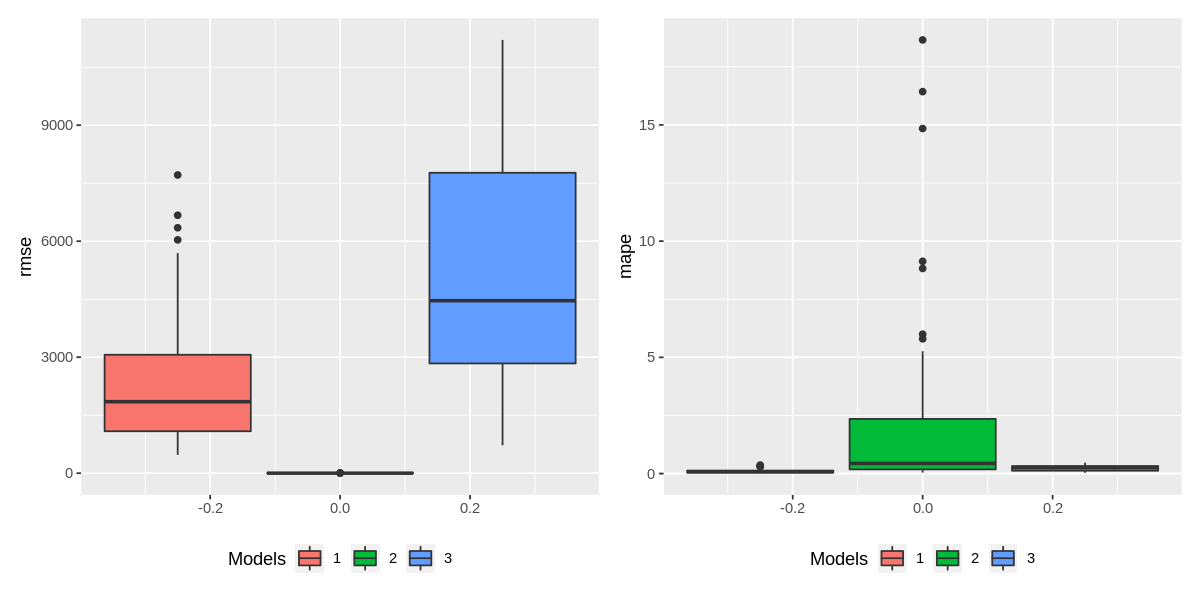

In [67]:
n.plot_errors(results)

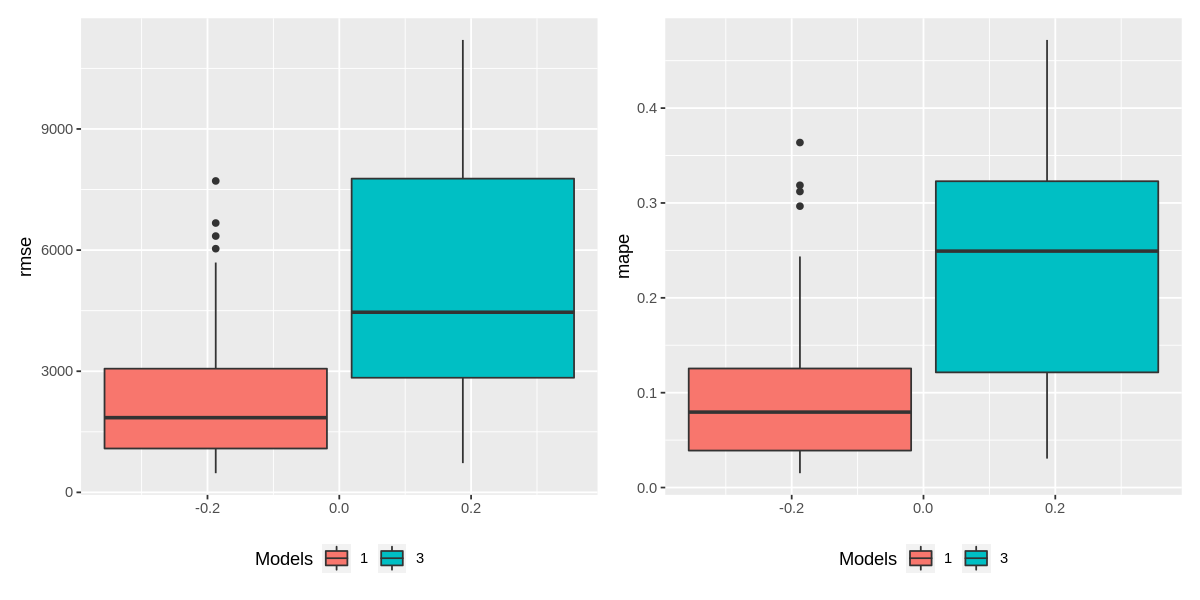

In [77]:
n.plot_errors(results[results$cs != 2,])

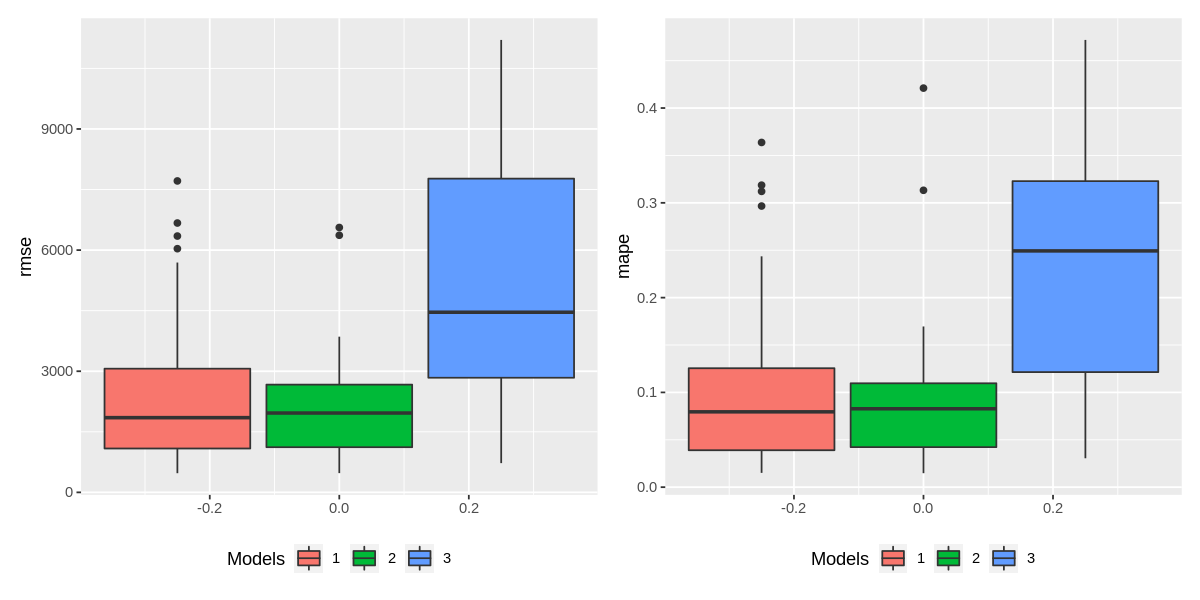